# Travel Package Purchase Prediction

##### Elige Grant
##### March 2021

## Data Description:

The dataset contains data on 4888 customers. The data include customer demographic information (age, gender, income, martial status, number of kids, etc.), various customer preferences/choices (personal or vacation orientated), information about the vacation sales pitch, and whether the customer purchased the vacation package. Among these 4888 customers, 920 (~19%) accepted the vaction package.

## Domain:

Travel

## Background and Context:

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic/Multi, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

## Objective:

To predict which customer is more likely to purchase the long term travel package.

## Data Dictionary:

### Customer Details:

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* <del>PreferredLoginDevice: Preferred login device of the customer in last month</del>
* TypeOfContact: Self-inquiry or Company Invite
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: Customer passport flag
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### Customer interation data:

* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer


## Steps and Tasks:

### 00 - Load libraries and data (view/summarize data)

In [239]:
#Loading libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics, tree
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [2]:
#Loading dataset
data_dict=pd.read_csv("Tourism - Data Dict.csv")
data = pd.read_csv("Tourism - Data.csv")

#### View Data Dictionary

In [3]:
# View full dictionary data
data_dict

Data                 Variable  \
0   Tourism               CustomerID   
1   Tourism                ProdTaken   
2   Tourism                      Age   
3   Tourism     PreferredLoginDevice   
4   Tourism                 CityTier   
5   Tourism          DurationOfPitch   
6   Tourism               Occupation   
7   Tourism                   Gender   
8   Tourism    NumberOfPersonVisited   
9   Tourism        NumberOfFollowups   
10  Tourism           ProductPitched   
11  Tourism    PreferredPropertyStar   
12  Tourism            MaritalStatus   
13  Tourism            NumberOfTrips   
14  Tourism                 Passport   
15  Tourism   PitchSatisfactionScore   
16  Tourism                   OwnCar   
17  Tourism  NumberOfChildrenVisited   
18  Tourism              Designation   
19  Tourism            MonthlyIncome   

                                          Discerption  
0                                  Unique customer ID  
1                                  Product taken flag  
2                                     Age of customer  
3    Preferred login device of customer in last month  
4                                           City tier  
5        Duration of pitch by a sales man to customer  
6                              Occupation of customer  
7                                  Gender of customer  
8           Total number of person came with customer  
9   Total number of follow up has been done by sal...  
10                    Product pitched by sales person  
11        Preferred hotel property rating by customer  
12                         Marital status of customer  
13       Average number of trip in a year by customer  
14                             Customer passport flag  
15                     Sales pitch satisfactory score  
16                          Customers owns a car flag  
17       Total number of children visit with customer  
18    Designation of customer in current organization  
19                   Gross monthly income of customer

#### View Data

In [4]:
# View first 5 rows of Data
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0        Salaried  Female                      3                3.0   
1        Salaried    Male                      3                4.0   
2     Free Lancer    Male                      3                4.0   
3        Salaried  Female                      2                3.0   
4  Small Business    Male                      2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0         1                       2       1                      0.0   
1         0                       3       1                      2.0   
2         1                       3       0                      0.0   
3         1                       5       1                      1.0   
4         0                       5       1                      0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [5]:
# View last 5 rows
data.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
4883  Small Business    Male                      3                5.0   
4884        Salaried    Male                      4                5.0   
4885        Salaried  Female                      4                4.0   
4886  Small Business    Male                      3                4.0   
4887        Salaried    Male                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
4883         1                       1       1                      1.0   
4884         1                       3       1                      2.0   
4885         0                       1       1                      3.0   
4886         0                       5       0                      2.0   
4887         1                       3       1                      2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

In [6]:
# Check data types and number of non-null values for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [7]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

- There are total 20 columns and 4888 number of rows in the dataset.
- Column data type is either integer (7 columns), float (7 columns), or object type (6 columns). We may need to recast these columns as a different data type (e.g., one-hot encoding)
- There are 12 columns that do not appear to have any null values. The columns that have null values (and may need clean-up) are:
 - Age                        
 - TypeofContact               
 - DurationOfPitch            
 - NumberOfFollowups           
 - PreferredPropertyStar       
 - NumberOfTrips              
 - NumberOfChildrenVisited     
 - MonthlyIncome              

In [8]:
# Summary numerical data
data.describe().T

count           mean          std       min  \
CustomerID               4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                4888.0       0.188216     0.390925       0.0   
Age                      4662.0      37.622265     9.316387      18.0   
CityTier                 4888.0       1.654255     0.916583       1.0   
DurationOfPitch          4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisited    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups        4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar    4862.0       3.581037     0.798009       3.0   
NumberOfTrips            4748.0       3.236521     1.849019       1.0   
Passport                 4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore   4888.0       3.078151     1.365792       1.0   
OwnCar                   4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisited  4822.0       1.187267     0.857861       0.0   
MonthlyIncome            4655.0   23619.853491  5380.698361    1000.0   

                               25%       50%        75%       max  
CustomerID               201221.75  202443.5  203665.25  204887.0  
ProdTaken                     0.00       0.0       0.00       1.0  
Age                          31.00      36.0      44.00      61.0  
CityTier                      1.00       1.0       3.00       3.0  
DurationOfPitch               9.00      13.0      20.00     127.0  
NumberOfPersonVisited         2.00       3.0       3.00       5.0  
NumberOfFollowups             3.00       4.0       4.00       6.0  
PreferredPropertyStar         3.00       3.0       4.00       5.0  
NumberOfTrips                 2.00       3.0       4.00      22.0  
Passport                      0.00       0.0       1.00       1.0  
PitchSatisfactionScore        2.00       3.0       4.00       5.0  
OwnCar                        0.00       1.0       1.00       1.0  
NumberOfChildrenVisited       1.00       1.0       2.00       3.0  
MonthlyIncome             20346.00   22347.0   25571.00   98678.0

In [9]:
# Check the unique values in each column of the dataframe.
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

In [10]:
# Check to see if there are duplicate rows
data.duplicated().sum()

0

In [11]:
# Value counts for all categorical items
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
0    3466
1    1422
Name: Passport, dty

Summary
- Customer ID
 - Not likely to be important
 - Continous customers from ID# 200000 to ID# 204887
- ProdTake
 - Binary (0 = Did not take/1 = Did take)
 - Most did not take (~80%)
- Age
 - Min is 18
 - Max is 61
 - Mean is 37.6
 - Median is 36
- CityTier
 - Presumably 1/2/3
 - Unsure if 1 is good/bad
 - Most are 1
- Duration of Pitch
 - Presumably in minutes
 - Min is 5
 - Max is 127
 - Mean is 15.5
 - Median is 13
- Number of Persons Visited
 - Min 1
 - Max 5
 - Mean ~3
 - Median is 3
- Number of follow-ups
 - Min 1
 - Max 6
 - Mean ~4
 - Median is 4
- Preferred Property Star
 - Rating out of 5 stars
 - Min 3
 - Max 5
 - Mean ~4 
 - Median is 3
- Number of Trips
 - Min 1
 - Max 22
 - Mean ~3
 - Median is 3
- Passport
 - Binary (0 = Does not have/1 = Does have)
 - Most do not have (70%)
- Pitch Satisfaction score
 - Rating out of 5 stars
 - Min 1
 - Max 5
 - Mean ~3
 - Median is 3
- Owns a car
 - Binary (0 = does not own/1= does own)
 - Most own a car (~60%)
- Number of kids to join on trip
 - Min 0
 - Max 3
 - Mean is ~1
 - Median is 1
- Monthly Income
 - Min 1000 dollars
 - Max 98678 dollars
 - Mean 23619 dollars 
 - Median is 22347 dollars
 
** Gender flagged for needing fix

#### Fix data

In [12]:
# Fix Gender column 'Fe Male' to 'Female'
data['Gender'].replace(to_replace='Fe Male',value='Female',inplace=True)
print(data['Gender'].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


### 01 - Perform an Exploratory Data Analysis on the data (7.5)
- Univariate analysis 
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Come up with a customer profile (characteristics of a customer) of the different packages 
- Any other exploratory deep dive

#### Univariate Analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [14]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

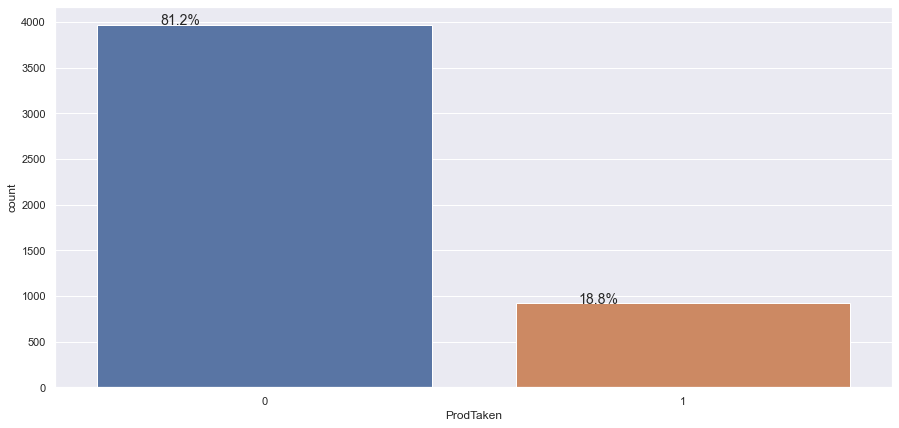

In [15]:
#Product Taken (1 = Yes, 0 = No)
perc_on_bar(data['ProdTaken'])

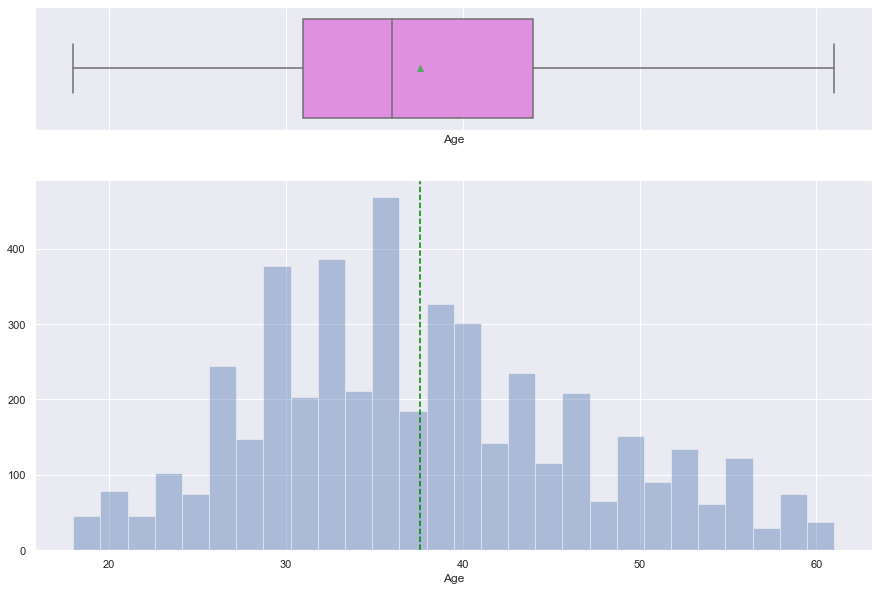

In [16]:
# Customer Age
histogram_boxplot(data['Age'])

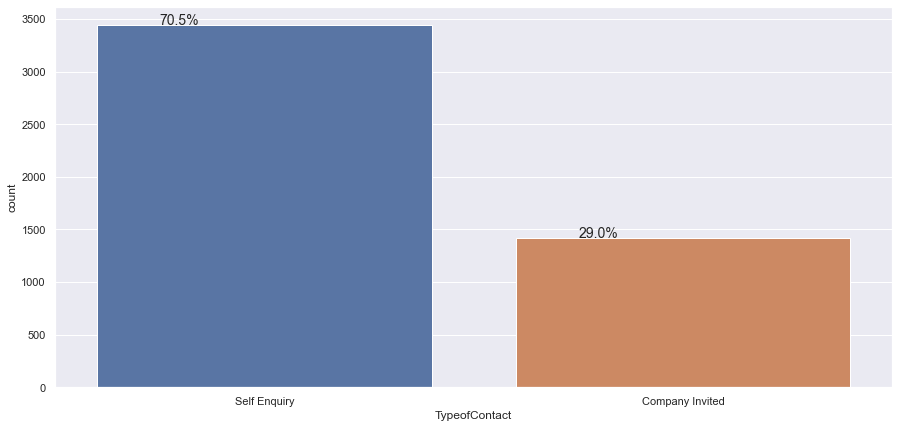

In [17]:
# Type of Contact
perc_on_bar(data['TypeofContact'])

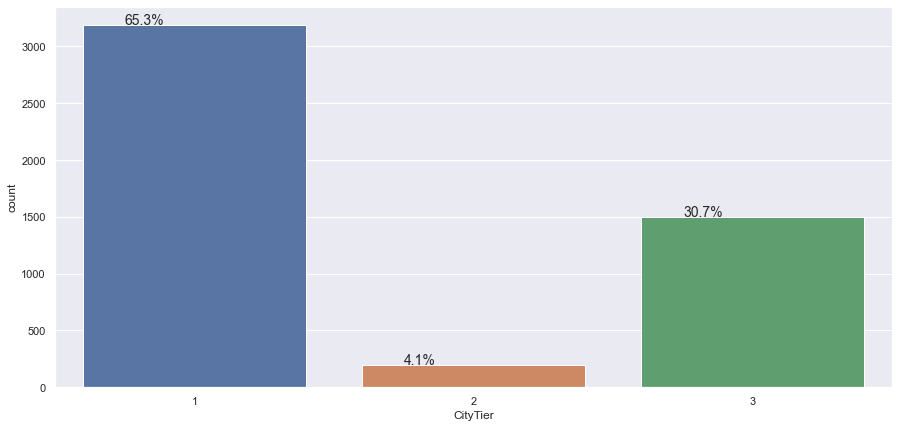

In [18]:
#City Tier
perc_on_bar(data['CityTier'])

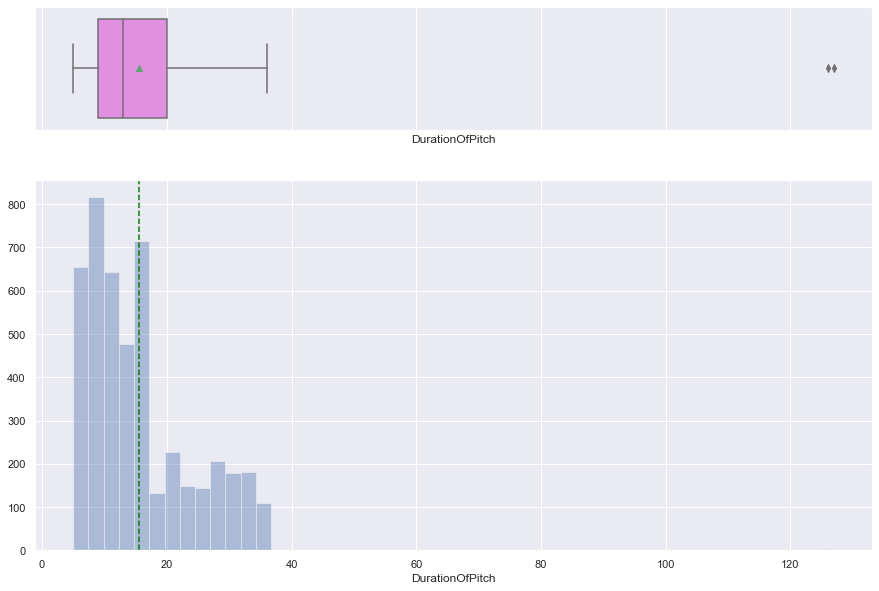

In [19]:
# Duration of Pitch (minutes?)
histogram_boxplot(data['DurationOfPitch'])

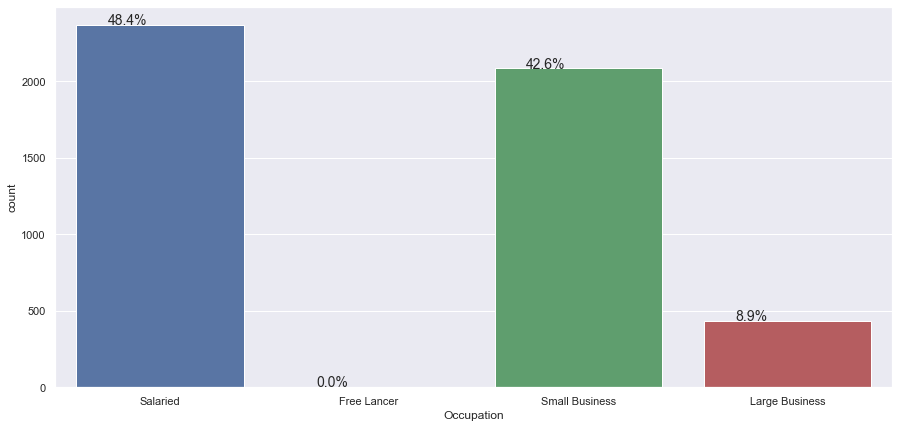

In [20]:
# Occupation
perc_on_bar(data['Occupation'])

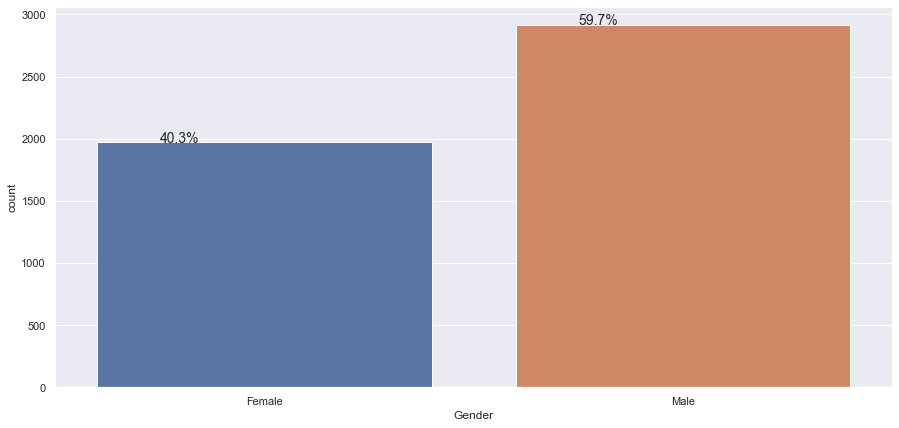

In [21]:
# Gender
perc_on_bar(data['Gender'])

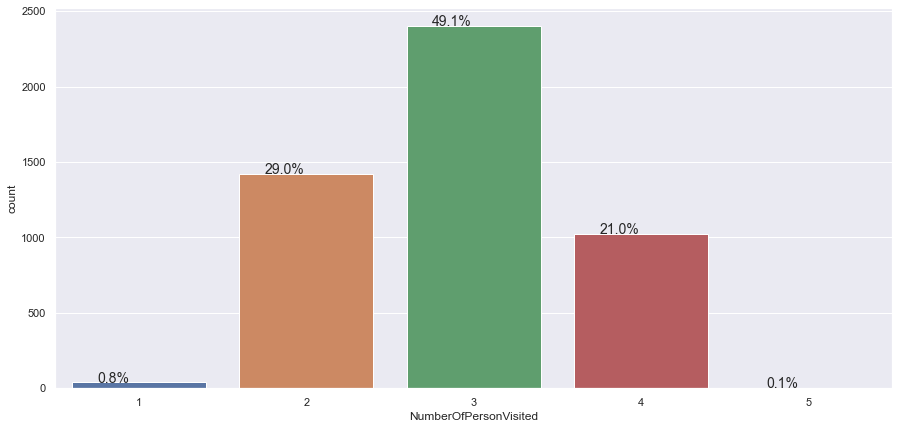

In [22]:
# Number Of Persons Visited (i.e., Number of people on trip)
perc_on_bar(data['NumberOfPersonVisited'])

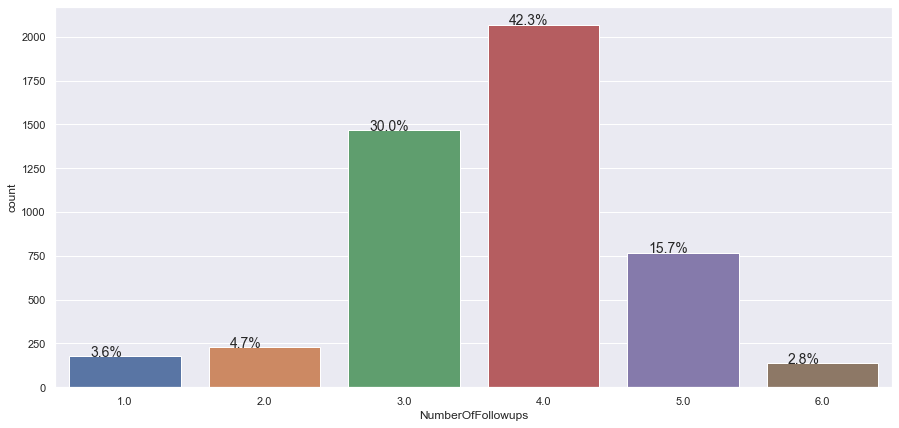

In [23]:
# Number Of Followups    
perc_on_bar(data['NumberOfFollowups'])      

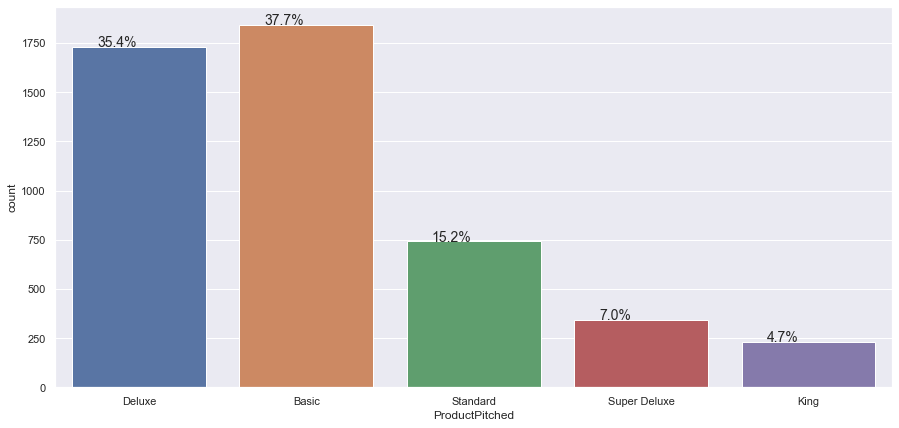

In [24]:
# Product Pitched   
perc_on_bar(data['ProductPitched'])  

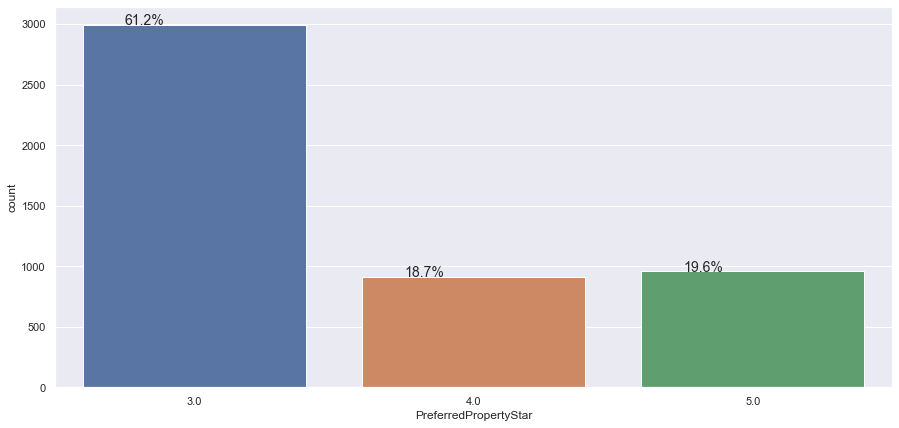

In [25]:
# Preferred Property Star (out of 5 stars)
perc_on_bar(data['PreferredPropertyStar'])  

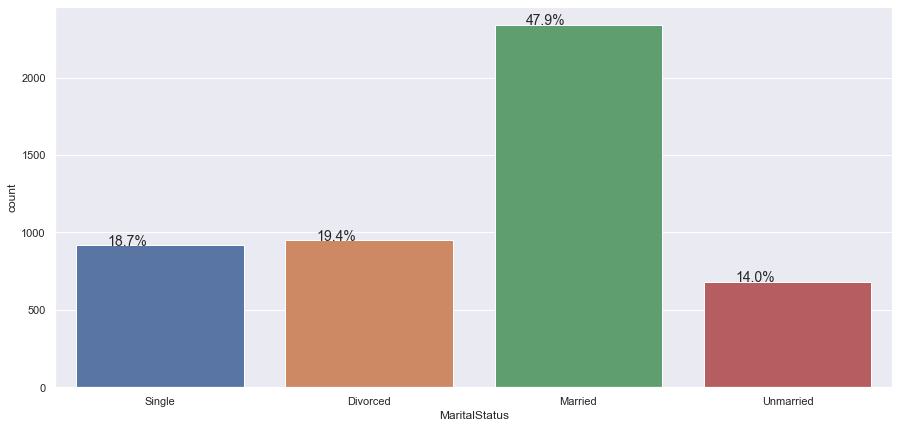

In [26]:
# Marital Status               
perc_on_bar(data['MaritalStatus'])

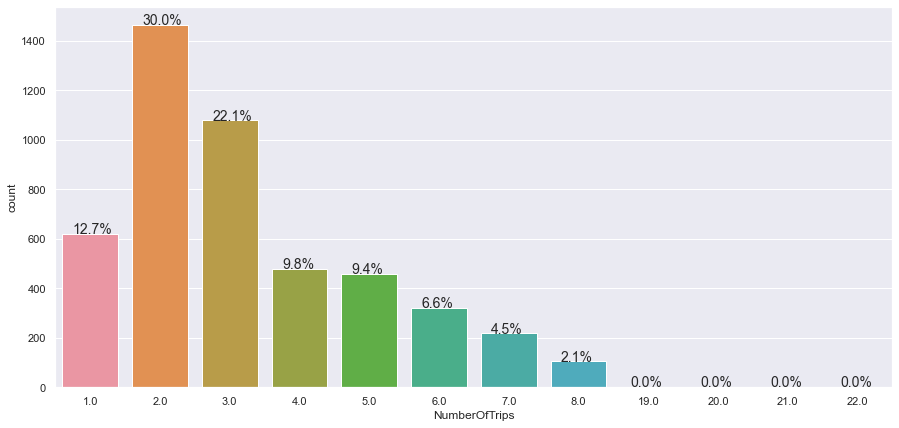

In [27]:
# Number Of Trips 
perc_on_bar(data['NumberOfTrips']) 

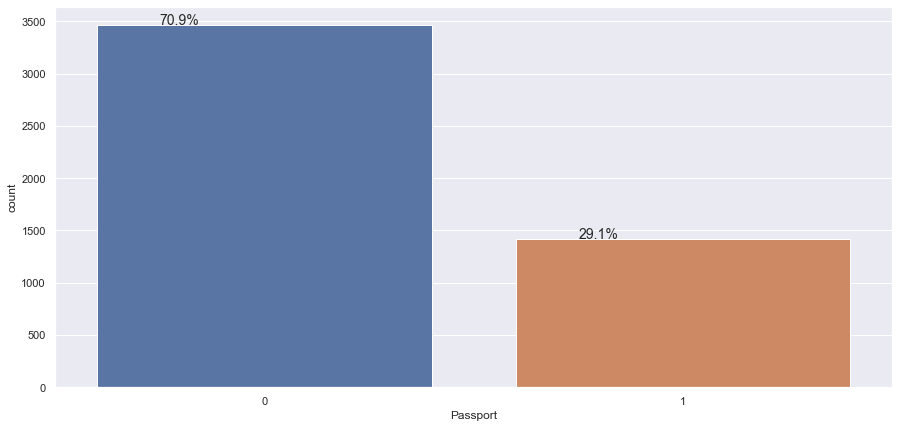

In [28]:
# Passport        (0 = Does not have/1 = Does have) 
perc_on_bar(data['Passport'])    

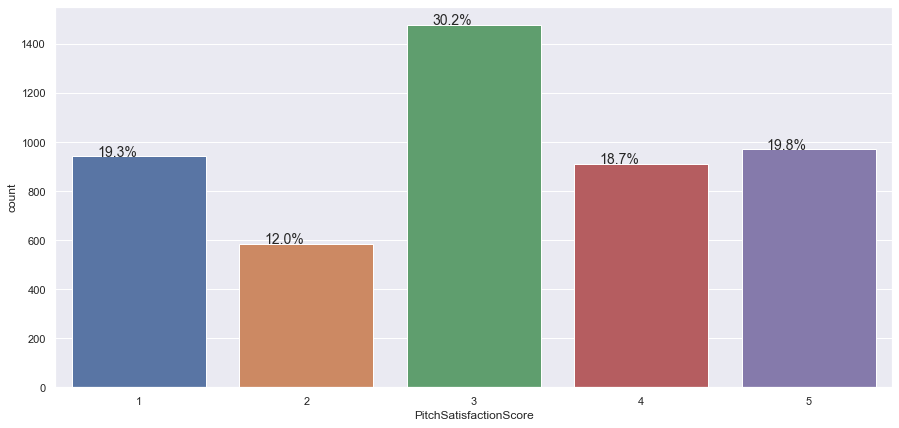

In [29]:
# PitchSatisfactionScore  
perc_on_bar(data['PitchSatisfactionScore'])  

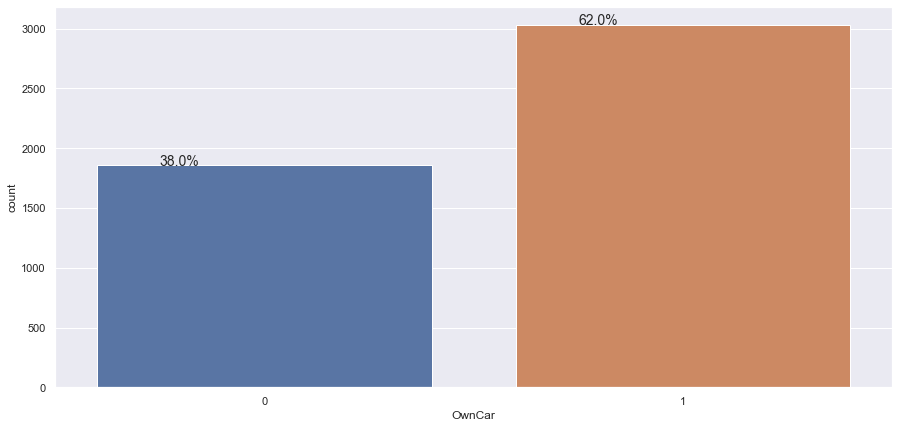

In [30]:
# OwnCar       (0 = Does not have/1 = Does have) 
perc_on_bar(data['OwnCar'])         

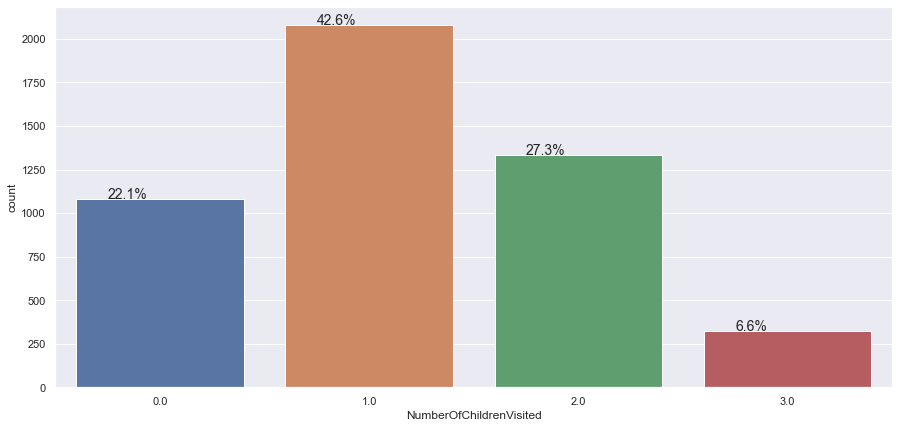

In [31]:
# NumberOfChildrenVisited  
perc_on_bar(data['NumberOfChildrenVisited']) 

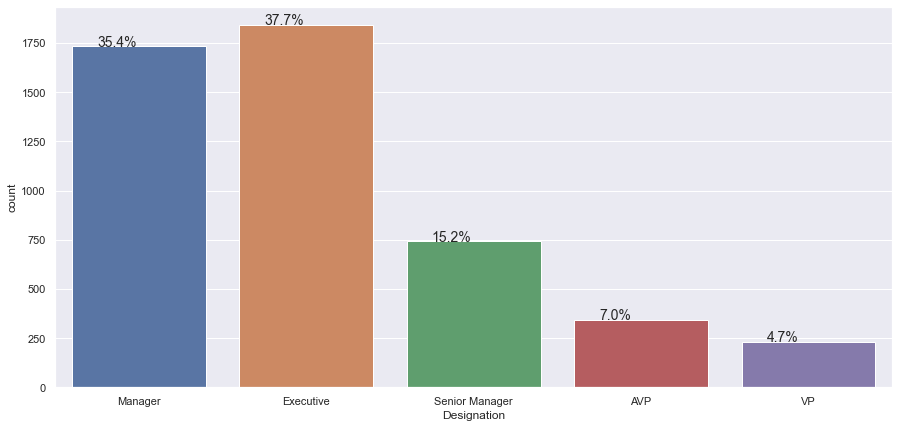

In [32]:
# Designation    
perc_on_bar(data['Designation'])

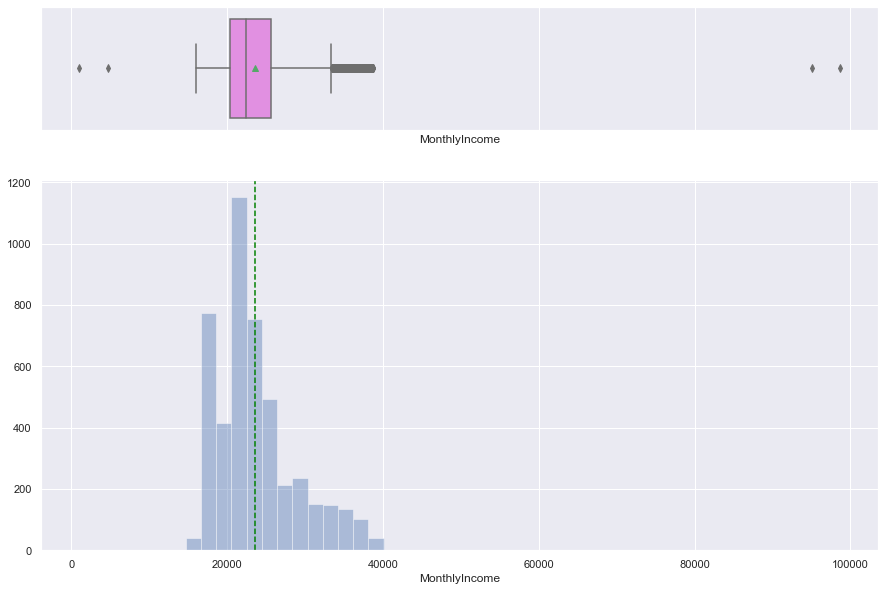

In [33]:
# MonthlyIncome  
histogram_boxplot(data['MonthlyIncome'])           

#### Bivariate Analysis

#### *Pairplot only continous features*

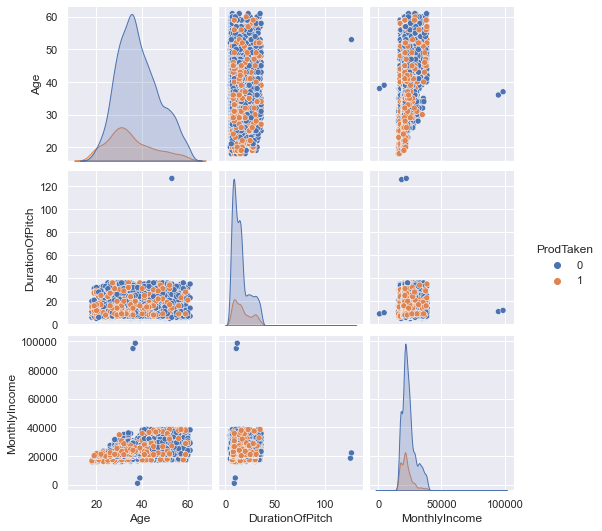

In [34]:
#Pairplot only continuous features to get basic feel
sns.pairplot(data=data,hue="ProdTaken",vars=['Age','DurationOfPitch','MonthlyIncome'])
plt.show()

* No apparent patterns with scatterplots of these continuous variables
* Although, Younger Age and Lower Income appear to be more likely to have purchased the offered vacation package

#### *Correlation Check*

In [35]:
data[data.columns[:]].corr()['ProdTaken'][:]

CustomerID                 0.056506
ProdTaken                  1.000000
Age                       -0.147254
CityTier                   0.086852
DurationOfPitch            0.078257
NumberOfPersonVisited      0.009627
NumberOfFollowups          0.112171
PreferredPropertyStar      0.099577
NumberOfTrips              0.018898
Passport                   0.260844
PitchSatisfactionScore     0.051394
OwnCar                    -0.011508
NumberOfChildrenVisited    0.007421
MonthlyIncome             -0.130585
Name: ProdTaken, dtype: float64

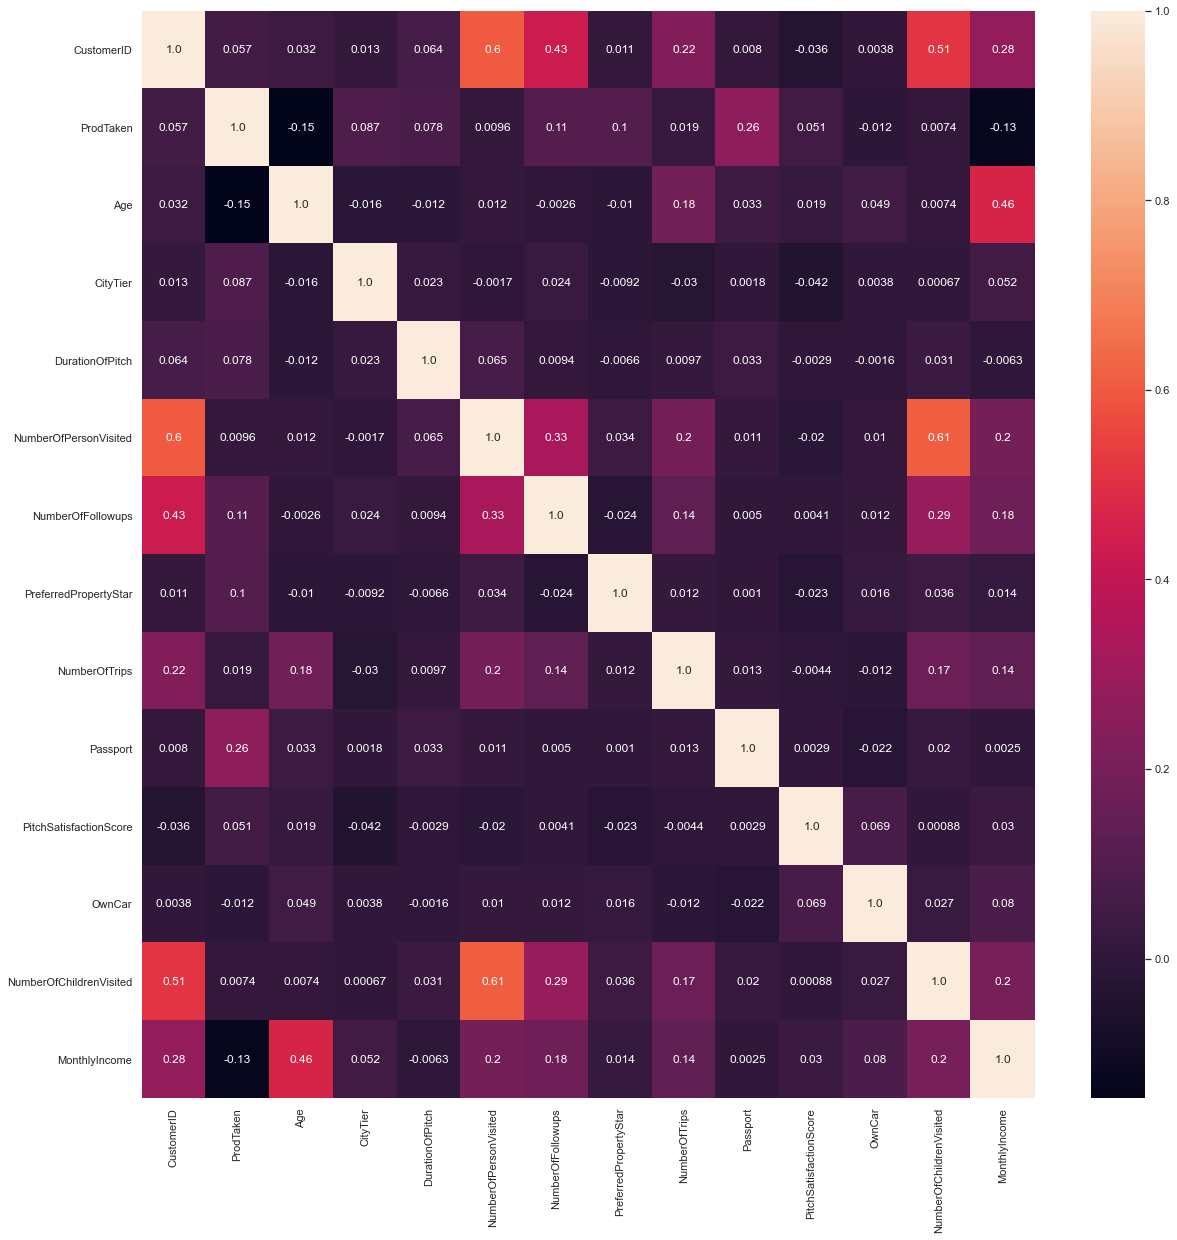

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

* No apparent strong correlation of any variable with the vacation product/package taken. The top 5 appear to be:
 * Passport (Postively Corr.)
 * Age (Negatively Corr.)
 * MonthlyIncome (Negatively Corr.)
 * Number of follow-ups (Positively Corr.)
 * Virtual Tie for 5th
   * PreferredPropertyStar
   * CityTier
   * DurationOfPitch
* Several variables appear to be moderately correlated with other variables. Namely:
 * Age & MonthlyIncome
 * NumberOfPersonVisited & NumberOfChildrenVisited

#### *Countplots Features WRT ProductTaken*

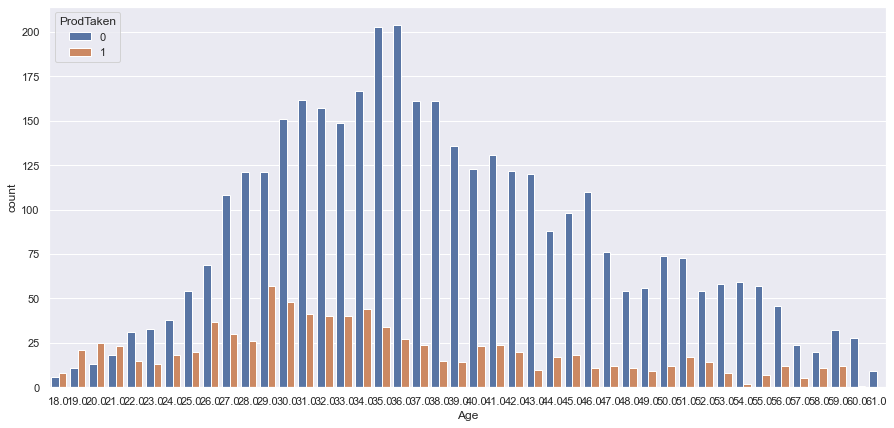

In [37]:
# Age
sns.countplot(x='Age', data=data, hue=data['ProdTaken']);

* Younger tends to be more likely to accept product

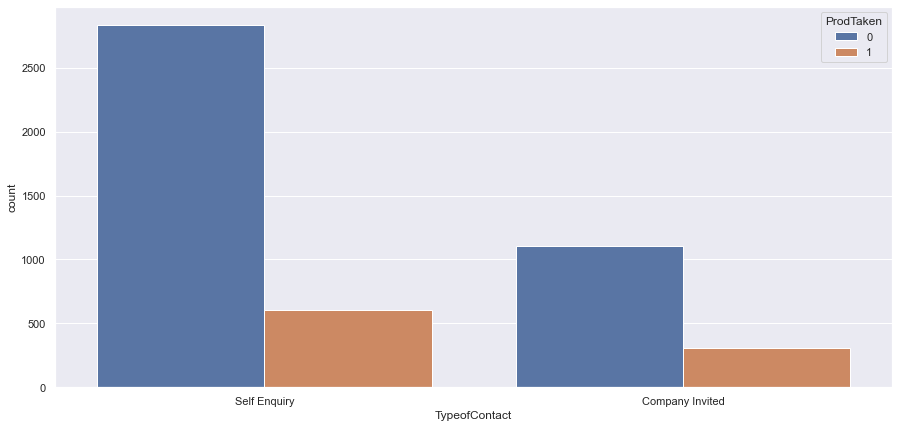

In [38]:
# TypeofContact
sns.countplot(x='TypeofContact', data=data, hue=data['ProdTaken']);

* A slight edge towards purchasing vacation product if Company Invite

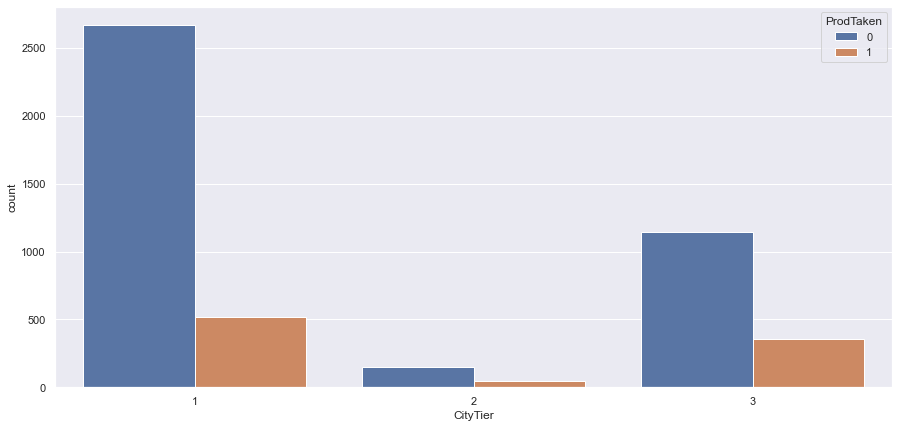

In [39]:
# CityTier
sns.countplot(x='CityTier', data=data, hue=data['ProdTaken']);

* A slight edge goes to CityTier 3 Clients for purchasing the vacation product offerred 

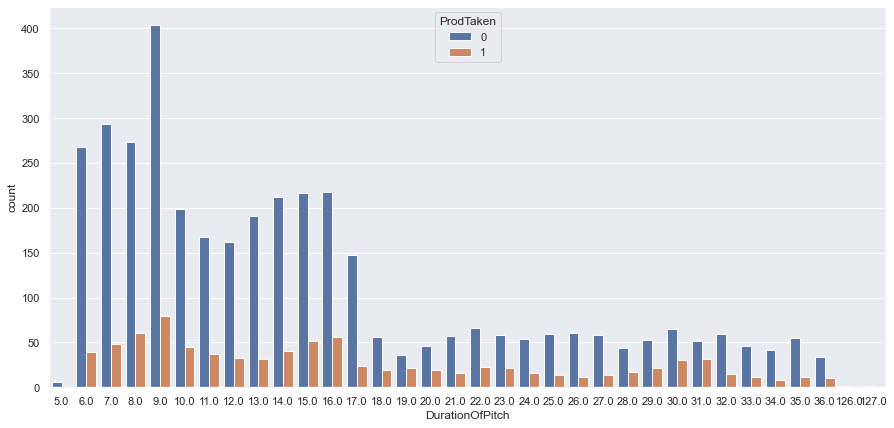

In [40]:
# DurationOfPitch
sns.countplot(x='DurationOfPitch', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate across the duration range

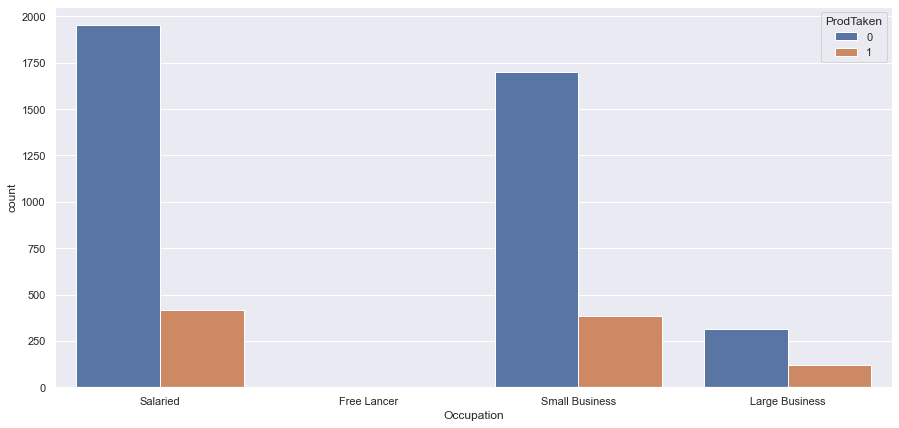

In [41]:
# Occupation
sns.countplot(x='Occupation', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate across the Occupation types

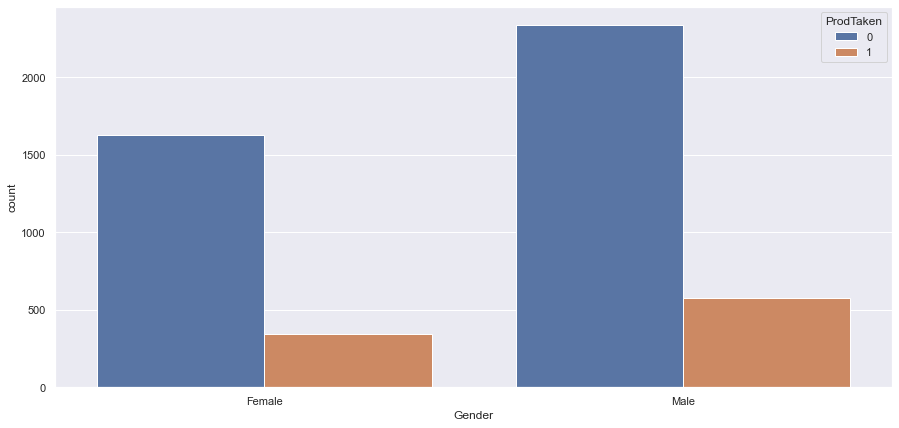

In [42]:
# Gender
sns.countplot(x='Gender', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate between the 2 genders

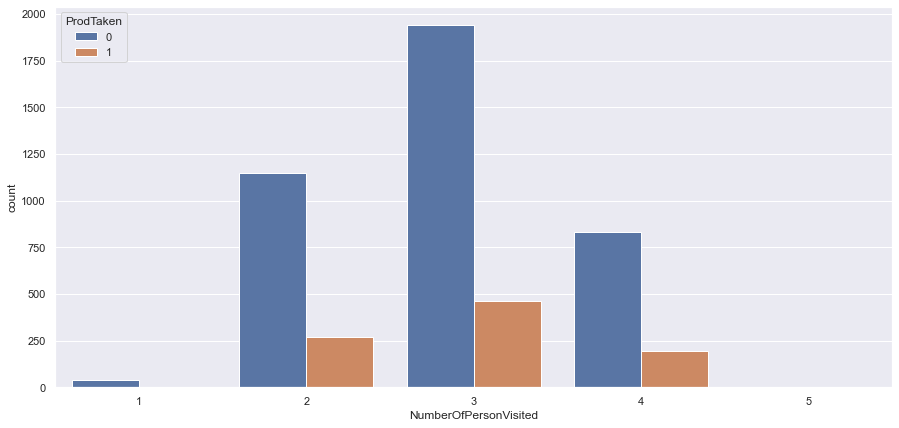

In [43]:
# NumberOfPersonVisited
sns.countplot(x='NumberOfPersonVisited', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate across the range of people on trip

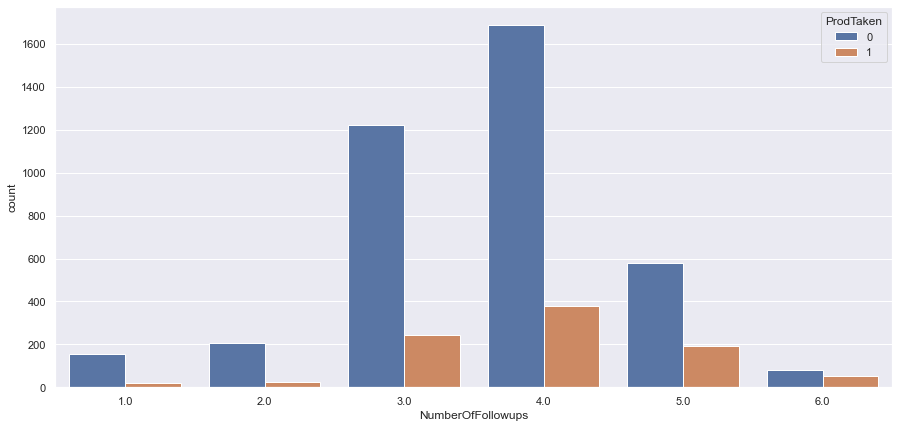

In [44]:
# NumberOfFollowups
sns.countplot(x='NumberOfFollowups', data=data, hue=data['ProdTaken']);

* Appears to be a slight uptick in purchases with an increase in follow-up calls

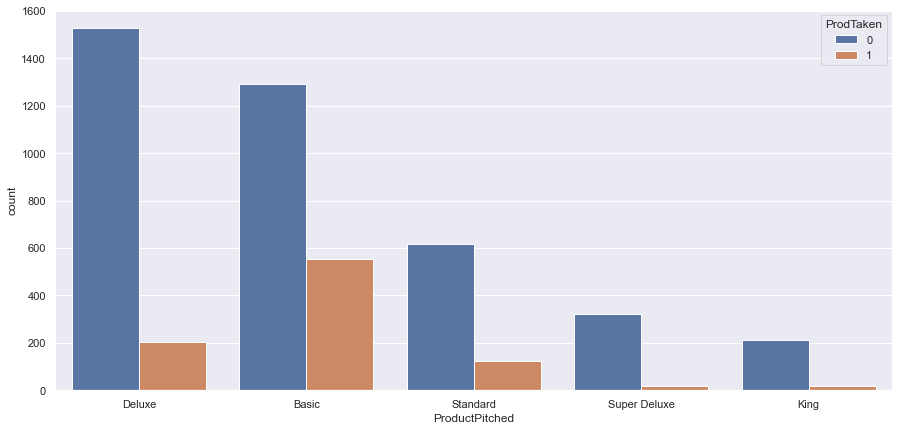

In [45]:
# ProductPitched
sns.countplot(x='ProductPitched', data=data, hue=data['ProdTaken']);

* The basic package had a much larger percentage of people purchase that package (which makes sense give the younger/lower income clients bought the most packages)

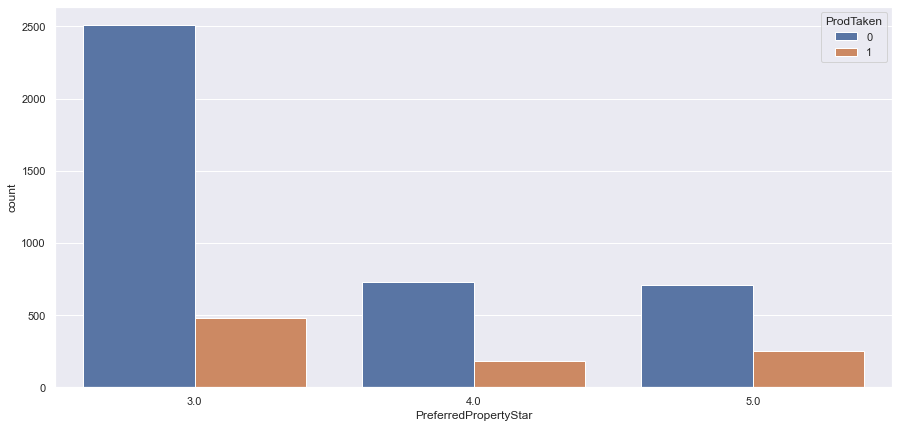

In [46]:
# PreferredPropertyStar
sns.countplot(x='PreferredPropertyStar', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate across the range of property rating preference

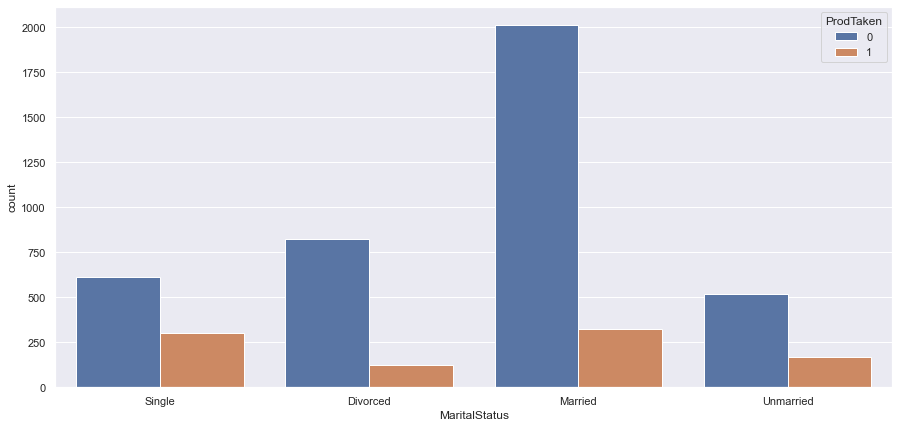

In [47]:
# MaritalStatus
sns.countplot(x='MaritalStatus', data=data, hue=data['ProdTaken']);

* The single clients had a much larger percentage of people purchase that package (which makes sense give the younger/lower income clients bought the most packages)

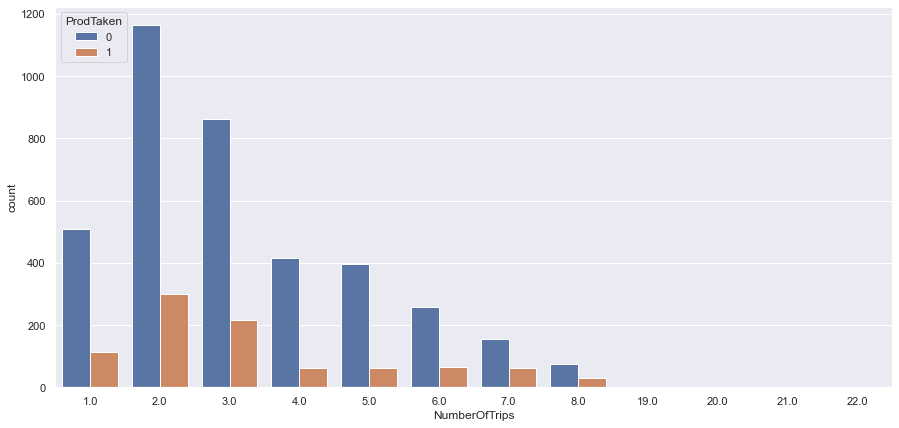

In [48]:
# NumberOfTrips
sns.countplot(x='NumberOfTrips', data=data, hue=data['ProdTaken']);

* Definitely a slight uptick in percentage of people who accept packages with increasing number of trips per year

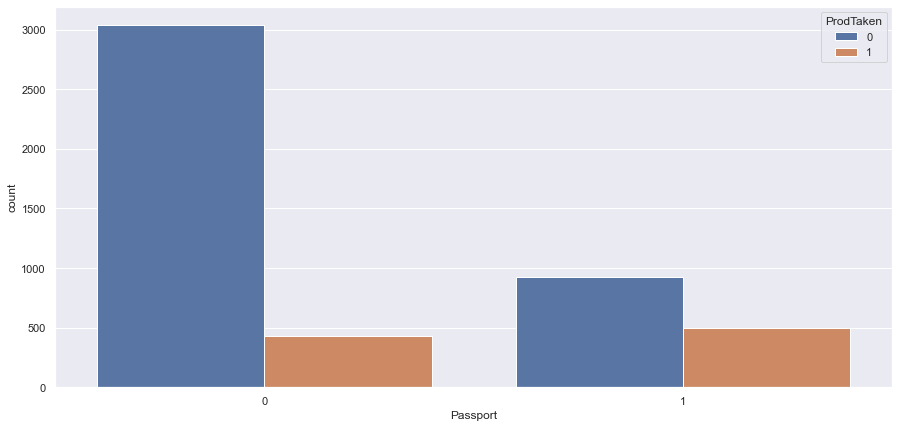

In [49]:
# Passport
sns.countplot(x='Passport', data=data, hue=data['ProdTaken']);

* More people with passports chose the vacation package more often

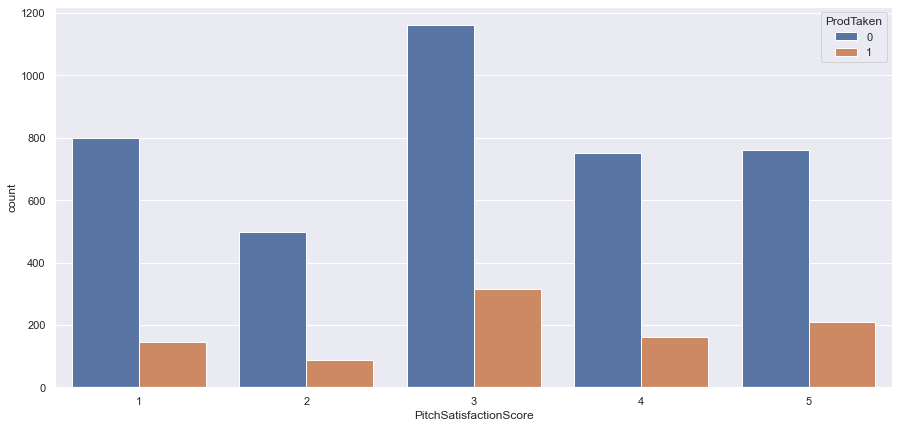

In [50]:
# PitchSatisfactionScore
sns.countplot(x='PitchSatisfactionScore', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate across the pitch satisfaction score

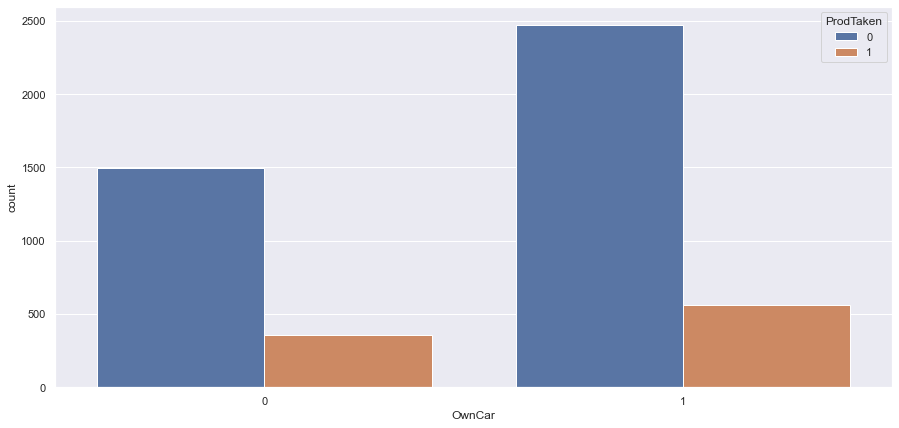

In [51]:
# OwnCar
sns.countplot(x='OwnCar', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate regardless if they owned a car

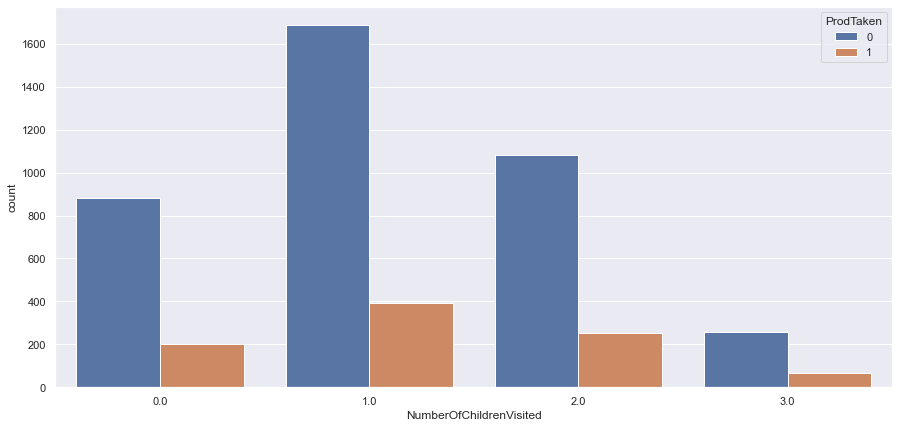

In [52]:
# NumberOfChildrenVisited
sns.countplot(x='NumberOfChildrenVisited', data=data, hue=data['ProdTaken']);

* No apparent trend here - simply looks like a 20-30% purchase rate regardless of the number of children accompanying clients

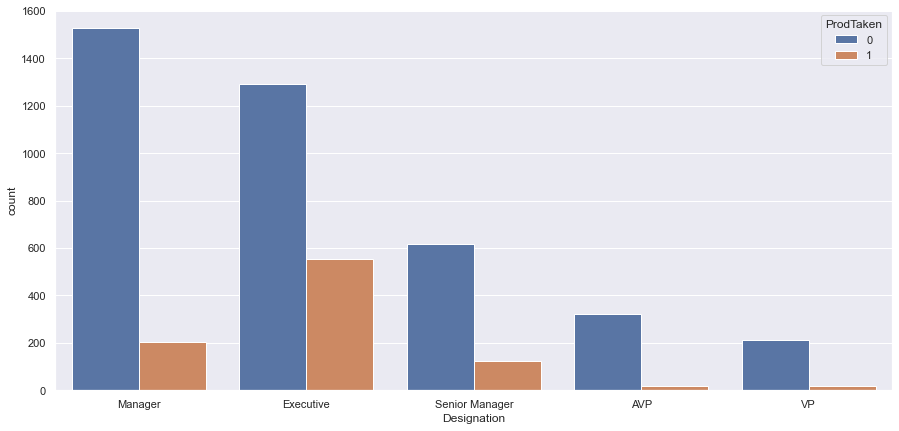

In [53]:
# Designation
sns.countplot(x='Designation', data=data, hue=data['ProdTaken']);

* The Executives had a much larger percentage of people purchase the package

(15000.0, 40000.0)

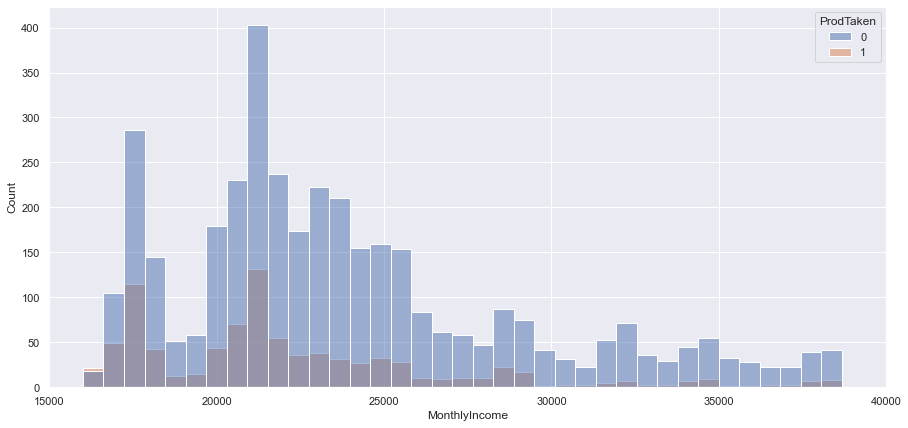

In [83]:
# MonthlyIncome
ax = sns.histplot(x='MonthlyIncome', data=data, hue=data['ProdTaken']);
ax.set_xlim([15000,40000])

* The lower income clients had a much larger percentage of people purchase the package (which makes sense give the younger clients bought the most packages)

#### *Boxplots of Continous Variables*

(15000.0, 40000.0)

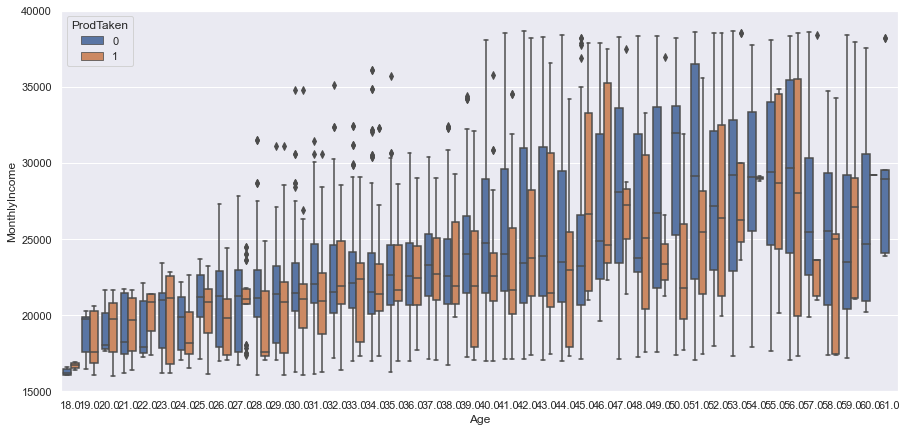

In [55]:
ax = sns.boxplot(x='Age', y='MonthlyIncome', data=data, hue=data['ProdTaken']);
ax.set_ylim([15000, 40000])

(15000.0, 40000.0)

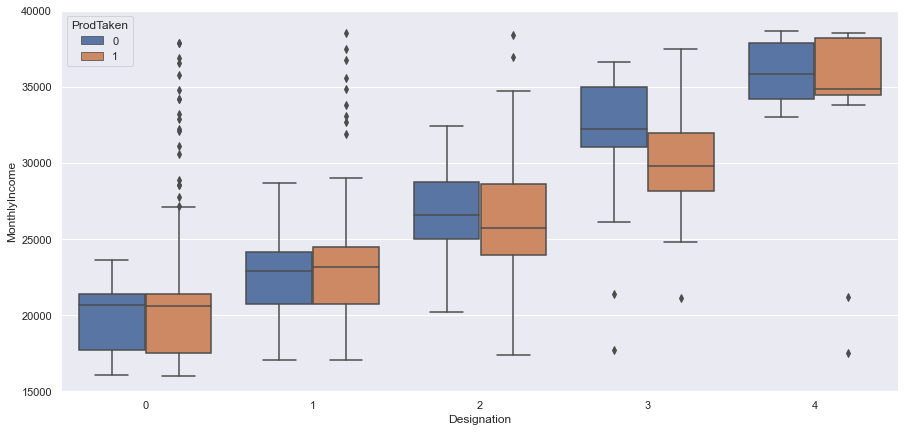

In [85]:
ax = sns.boxplot(x='Designation', y='MonthlyIncome', data=data, hue=data['ProdTaken']);
ax.set_ylim([15000, 40000])

* Hard to tell with these two boxplots if anything meaning full can be extracted
* One apparent observation is that the higher income Executives/Managers tend to accept the vacation packages more often than not
* Also, the AVP and VP tend to be on the younger side when they tend to accept more often

#### Scatterplot of Monthly Income vs. Age vs. Job Designation (and ProdTaken)

(15000.0, 40000.0)

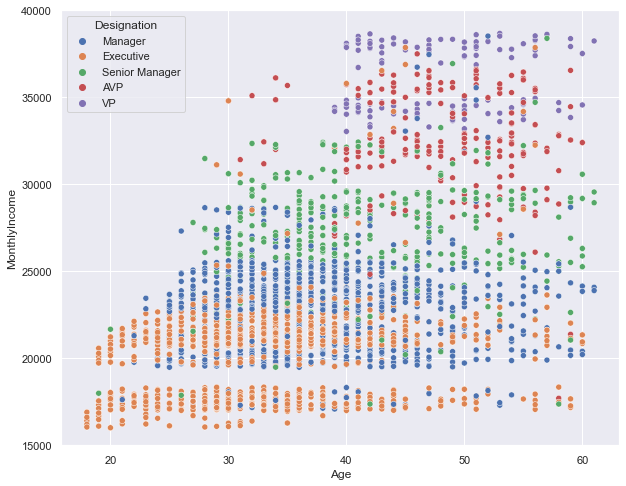

In [57]:
# MonthlyIncome vs. Age (ProdTaken)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='MonthlyIncome',hue='Designation')
ax.set_ylim([15000, 40000])

(15000.0, 40000.0)

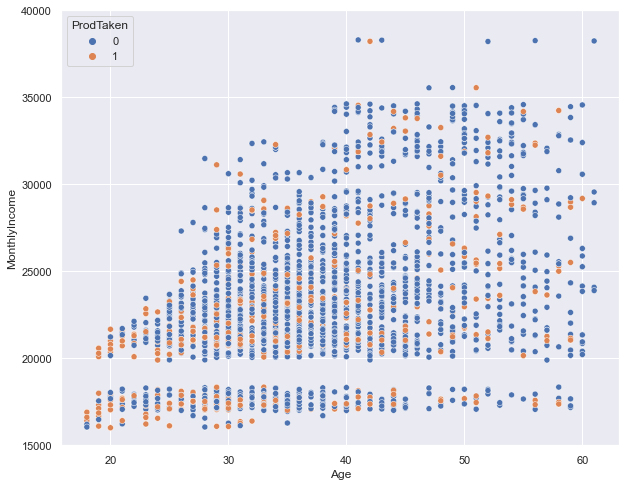

In [244]:
# MonthlyIncome vs. Age (ProdTaken)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='MonthlyIncome',hue='ProdTaken')
ax.set_ylim([15000, 40000])

(15000.0, 40000.0)

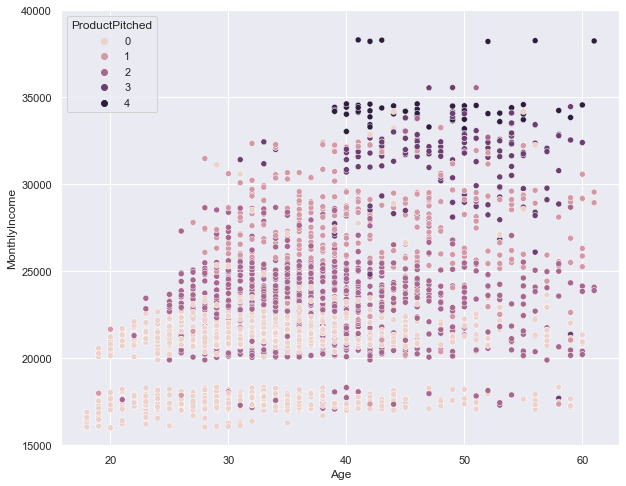

In [245]:
# MonthlyIncome vs. Age (ProductPitched)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='MonthlyIncome',hue='ProductPitched')
ax.set_ylim([15000, 40000])

* It seems that MonthlyIncome and age allow for a fairly good way to separate the job designations, but that doesn't necessaryily translate to separating the Product Takers from the Product Leavers

### 02 - Illustrate the insights based on EDA (5)
- Key meaningful observations on the relationship between variables

#### *Plots that tell the best story*

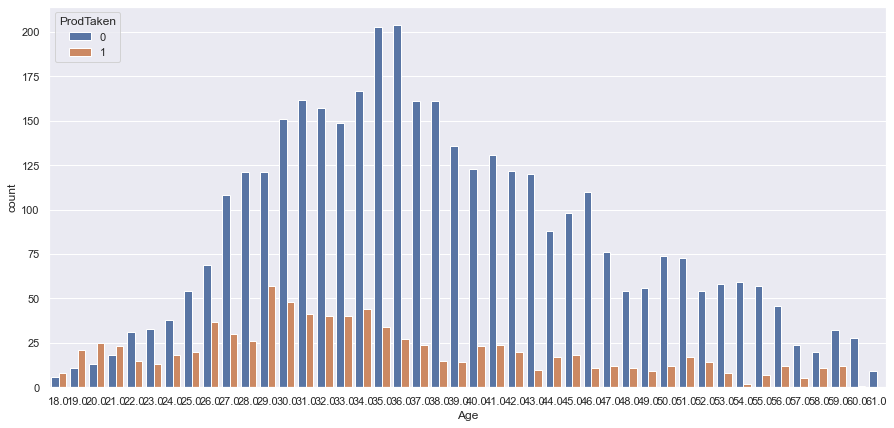

In [87]:
#1 Age
sns.countplot(x='Age', data=data, hue=data['ProdTaken']);

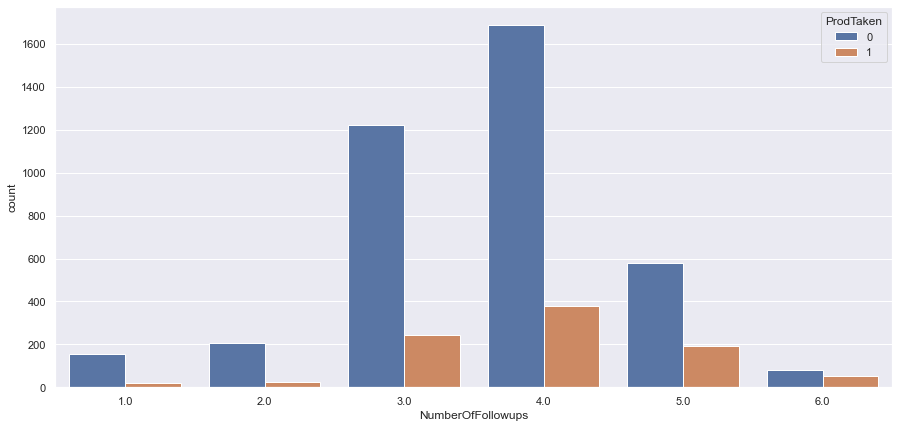

In [88]:
#2 NumberOfFollowups
sns.countplot(x='NumberOfFollowups', data=data, hue=data['ProdTaken']);

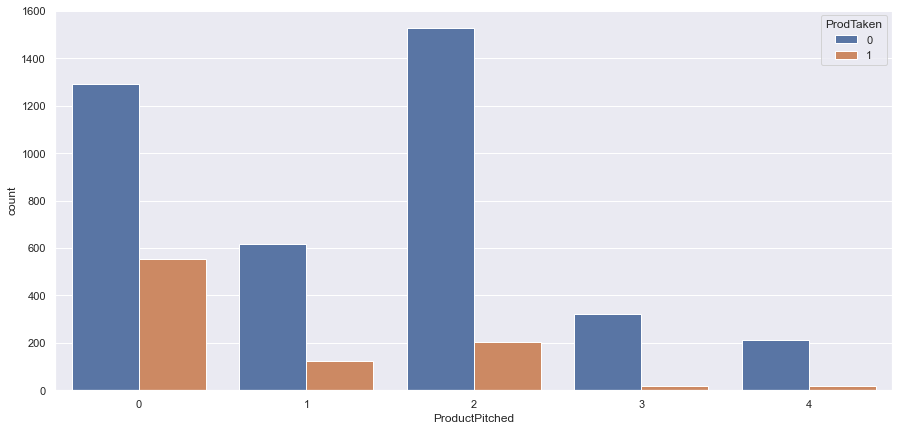

In [89]:
#3 ProductPitched
sns.countplot(x='ProductPitched', data=data, hue=data['ProdTaken']);

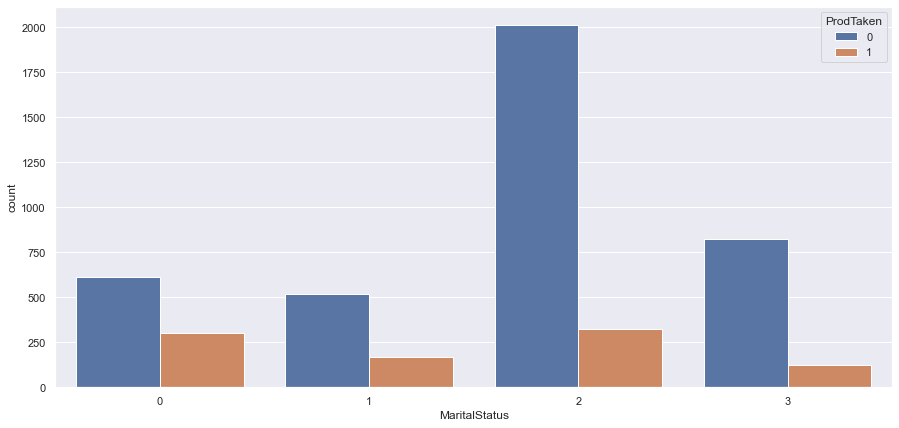

In [90]:
#4 MaritalStatus
sns.countplot(x='MaritalStatus', data=data, hue=data['ProdTaken']);

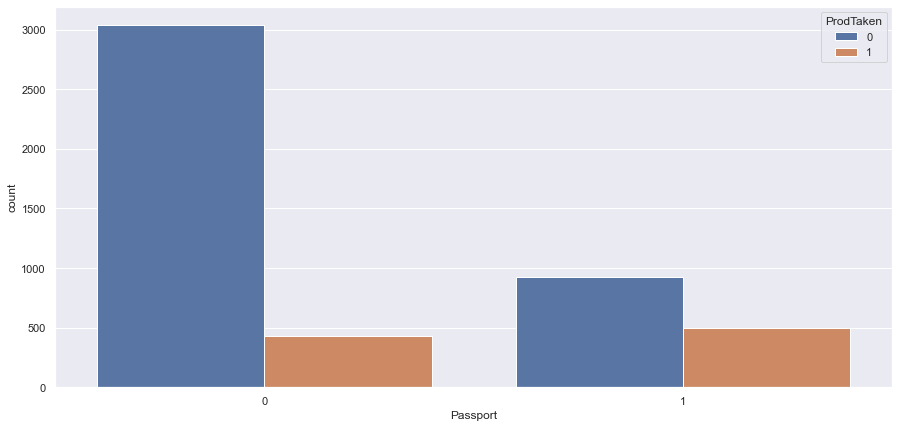

In [91]:
#5 Passport
sns.countplot(x='Passport', data=data, hue=data['ProdTaken']);

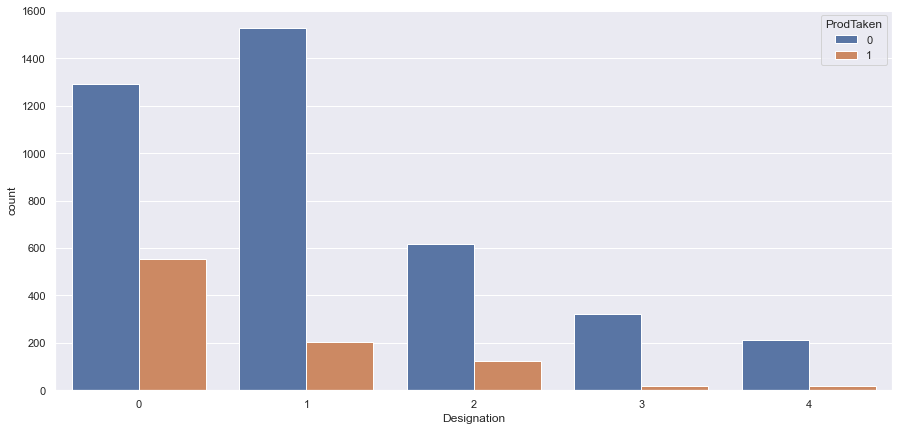

In [93]:
#6 Designation
sns.countplot(x='Designation', data=data, hue=data['ProdTaken']);

Observations
1. Younger/Lower income tends to purchase packages
2. Getting more than 2 follow-ups seem to generate a 15-30% rate on product purchase
3. The basic package was by far the most popular, likely because most purchases came from younger/lower income folks
4. Single people were the most likely to purchase packages (by percentage of their martial status group) 
5. People who have passports are more likely to travel
6. Executives were the most likely to purchase packages (by %) and also purchased the most packages (by total)

### 03 - Data Pre-processing (7.5)
Prepare the data for analysis 
- Missing value Treatment, Outlier Detection(treat, if needed- why or why not )
- Feature Engineering
- Prepare data for modeling

#### *Investigate and Fix Outliers (if necessary)*

In [58]:
# DurationOfPitch
# - A few pitch times were over 120 minutes (with no other times above 40 minutes). 
# - Investigate whether these were meant to be smaller (e.g., remove 0 to make 12 minutes)

In [59]:
data.loc[data['DurationOfPitch'] > 40]

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
1434      201434          0   NaN  Company Invited         3            126.0   
3878      203878          0  53.0  Company Invited         3            127.0   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
1434   Salaried   Male                      2                3.0   
3878   Salaried   Male                      3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
1434          Basic                    3.0       Married            3.0   
3878          Basic                    3.0       Married            4.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
1434         0                       1       1                      1.0   
3878         0                       1       1                      2.0   

     Designation  MonthlyIncome  
1434   Executive        18482.0  
3878   Executive        22160.0

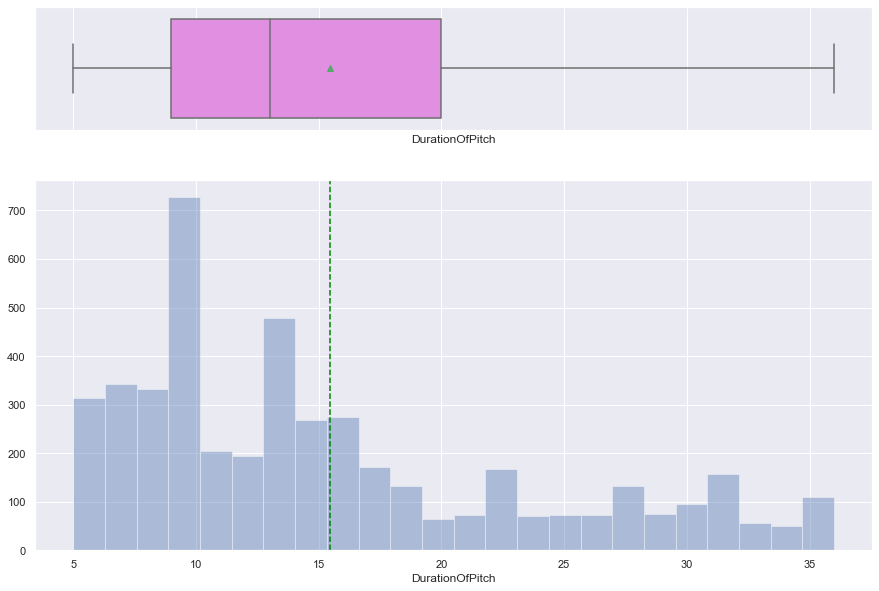

In [60]:
# Fix DurationOfPitch Column for two large to be the median (13 minutes)
data.loc[data['DurationOfPitch'] > 40,'DurationOfPitch']=13

# New Duration of Pitch (minutes?) Univariate plots
histogram_boxplot(data['DurationOfPitch'])

* Unlikely that two pitches ran over 2 hours, especially when pitch rating was a 1
* Changed lengh of pitch to be the Median (~13)

In [61]:
# MonthlyIncome
# - Several month Incomes appear to be too small or too large
# - Investigate whether too small values are missing an extral "0" or other
# - Investigate whether too large values have too many "0's" or other

In [62]:
data.loc[((data['MonthlyIncome'] > 60000) | (data['MonthlyIncome'] < 6000))]

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
38        200038          0  36.0  Self Enquiry         1             11.0   
142       200142          0  38.0  Self Enquiry         1              9.0   
2482      202482          0  37.0  Self Enquiry         1             12.0   
2586      202586          0  39.0  Self Enquiry         1             10.0   

          Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
38          Salaried  Female                      2                4.0   
142   Large Business  Female                      2                3.0   
2482        Salaried  Female                      3                5.0   
2586  Large Business  Female                      3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
38            Basic                    NaN      Divorced            1.0   
142          Deluxe                    3.0        Single            4.0   
2482          Basic                    5.0      Divorced            2.0   
2586         Deluxe                    3.0        Single            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
38           1                       2       1                      0.0   
142          1                       5       0                      0.0   
2482         1                       2       1                      1.0   
2586         1                       5       0                      1.0   

     Designation  MonthlyIncome  
38     Executive        95000.0  
142      Manager         1000.0  
2482   Executive        98678.0  
2586     Manager         4678.0

In [63]:
# Neither data point took the product offerred, so their contribution may not be necessary. 
# Delete?
# Replace with median for their age/designation group? (pick this)

In [64]:
# Find median EXECUTIVE salary between ages 35 and 40
(data.loc[((data['Age'] >= 35) & (data['Age'] <= 40) & (data['Designation'] == 'Executive')),'MonthlyIncome']).median()

20947.0

In [65]:
# Find median MANAGER salary between ages 35 and 40
(data.loc[((data['Age'] >= 35) & (data['Age'] <= 40) & (data['Designation'] == 'Manager')),'MonthlyIncome']).median()

23110.5

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

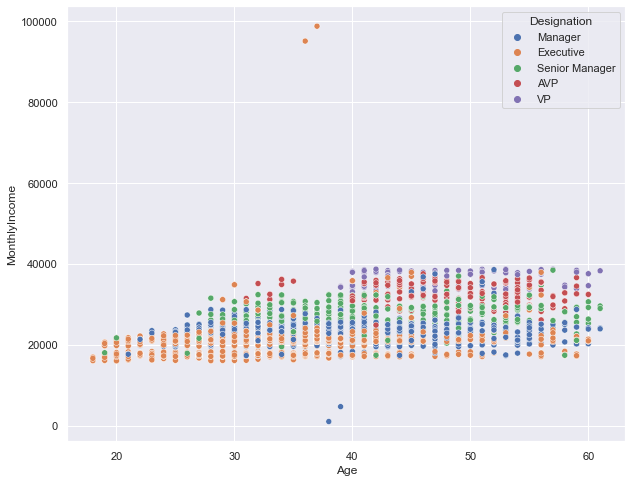

In [66]:
# MonthlyIncome vs. Age (NumberOfTrips)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='MonthlyIncome',hue='Designation')

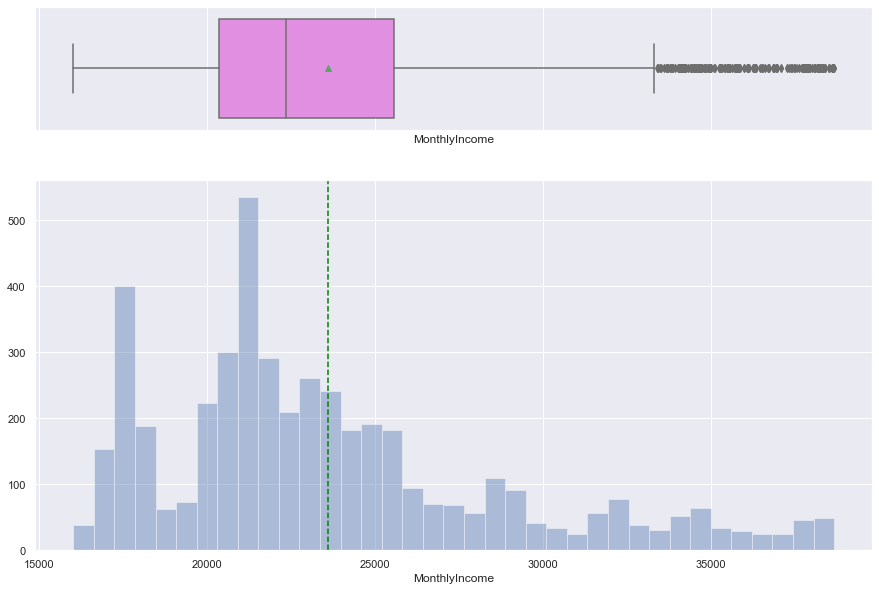

In [67]:
# Fix Monthly Income Column for two large AND two small incomes
data.loc[data['MonthlyIncome'] > 60000,'MonthlyIncome']=20950
data.loc[data['MonthlyIncome'] < 6000,'MonthlyIncome']=23100

# New Monthly Income Univariate plots
histogram_boxplot(data['MonthlyIncome'])

In [68]:
# NumberOfTrips
# - Number of trips abrubtly goes from 8 trips (avg. per year) to 19
# - Investigate whether the # trips should be lowered (substantially) for those customers

In [69]:
data.loc[data['NumberOfTrips'] > 10]

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
385       200385          1  30.0  Company Invited         1             10.0   
816       200816          0  39.0  Company Invited         1             15.0   
2829      202829          1  31.0  Company Invited         1             11.0   
3260      203260          0  40.0  Company Invited         1             16.0   

          Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
385   Large Business   Male                      2                3.0   
816         Salaried   Male                      3                3.0   
2829  Large Business   Male                      3                4.0   
3260        Salaried   Male                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
385           Basic                    3.0        Single           19.0   
816          Deluxe                    4.0     Unmarried           21.0   
2829          Basic                    3.0        Single           20.0   
3260         Deluxe                    4.0     Unmarried           22.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
385          1                       4       1                      1.0   
816          0                       2       1                      0.0   
2829         1                       4       1                      2.0   
3260         0                       2       1                      1.0   

     Designation  MonthlyIncome  
385    Executive        17285.0  
816      Manager        21782.0  
2829   Executive        20963.0  
3260     Manager        25460.0

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

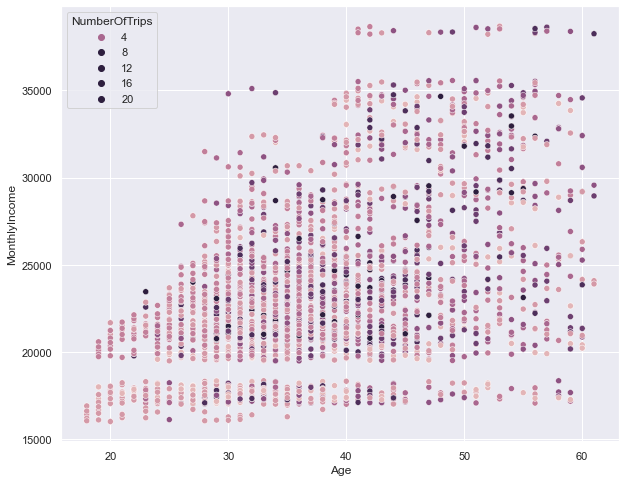

In [70]:
# MonthlyIncome vs. Age (NumberOfTrips)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='MonthlyIncome',hue='NumberOfTrips',hue_norm=(0,8))

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

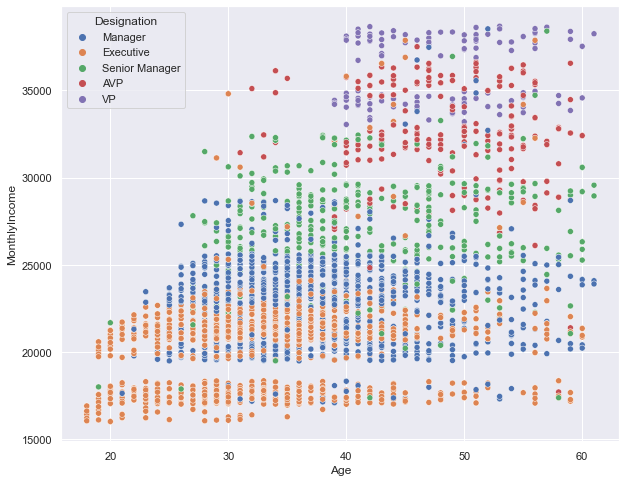

In [71]:
# MonthlyIncome vs. Age (NumberOfTrips)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='MonthlyIncome',hue='Designation')

In [72]:
# - The values for Number Of Trips seem to have large variance and no bias towards 
# a particular group of people (vs. Age, vs. Income, vs. Designation)
# - Will set to median for their age, income, designation)

In [73]:
# Find median EXECUTIVE Number Of Trips between ages 30 and 35
(data.loc[((data['Age'] >= 30) & (data['Age'] <= 35) & (data['Designation'] == 'Executive')),'NumberOfTrips']).median()

3.0

In [74]:
# Find median MANAGER Number Of Trips between ages 35 and 40
(data.loc[((data['Age'] >= 35) & (data['Age'] <= 40) & (data['Designation'] == 'Manager')),'NumberOfTrips']).median()

3.0

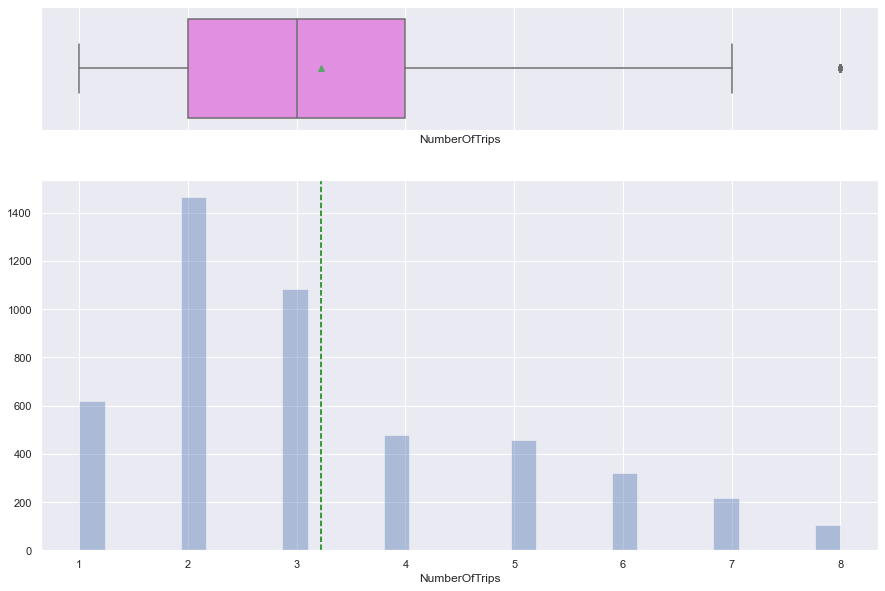

In [75]:
# Fix NumberOfTrips Column for four large values (use median of 3)
data.loc[data['NumberOfTrips'] > 15,'NumberOfTrips']=3

# New Monthly Income Univariate plots
histogram_boxplot(data['NumberOfTrips'])

#### Encode categorical data

##### New Data Dictionary for Categorical Entries with String Values:

###### Customer Details:

* TypeOfContact: 
 * 0 = Self Enquiry
 * 1 = Company Invited
* Occupation: Occupation of customer
 * 0 = Free Lancer
 * 1 = Small Business
 * 2 = Large Business
 * 3 = Salaried
* Gender: Gender of customer
 * 0 = Male
 * 1 = Female
* MaritalStatus: Marital status of customer
 * 0 = Single
 * 1 = Unmarried
 * 2 = Married
 * 3 = Divorced
* Designation: Designation of the customer in the current organization
 * 0 = Executive
 * 1 = Manager
 * 2 = Senior Manager
 * 3 = AVP
 * 4 = VP

###### Customer interation data:

* ProductPitched: Product pitched by a salesperson
 * 0 = Basic
 * 1 = Standard
 * 2 = Deluxe
 * 3 = Super Deluxe
 * 4 = King

In [193]:
# TypeofContact
data.loc[data['TypeofContact'] == 'Self Enquiry','TypeofContact']=0
data.loc[data['TypeofContact'] == 'Company Invited','TypeofContact']=1

# Occupation
data.loc[data['Occupation'] == 'Free Lancer','Occupation']=0
data.loc[data['Occupation'] == 'Small Business','Occupation']=1
data.loc[data['Occupation'] == 'Large Business','Occupation']=2
data.loc[data['Occupation'] == 'Salaried','Occupation']=3

# Gender
data.loc[data['Gender'] == 'Male','Gender']=0
data.loc[data['Gender'] == 'Female','Gender']=1

#MaritalStatus
data.loc[data['MaritalStatus'] == 'Single','MaritalStatus']=0
data.loc[data['MaritalStatus'] == 'Unmarried','MaritalStatus']=1
data.loc[data['MaritalStatus'] == 'Married','MaritalStatus']=2
data.loc[data['MaritalStatus'] == 'Divorced','MaritalStatus']=3

#Designation
data.loc[data['Designation'] == 'Executive','Designation']=0
data.loc[data['Designation'] == 'Manager','Designation']=1
data.loc[data['Designation'] == 'Senior Manager','Designation']=2
data.loc[data['Designation'] == 'AVP','Designation']=3
data.loc[data['Designation'] == 'VP','Designation']=4

#ProductPitched
data.loc[data['ProductPitched'] == 'Basic','ProductPitched']=0
data.loc[data['ProductPitched'] == 'Standard','ProductPitched']=1
data.loc[data['ProductPitched'] == 'Deluxe','ProductPitched']=2
data.loc[data['ProductPitched'] == 'Super Deluxe','ProductPitched']=3
data.loc[data['ProductPitched'] == 'King','ProductPitched']=4

data["TypeofContact"] = data["TypeofContact"].astype("int")
data["Occupation"] = data["Occupation"].astype("int")
data["Gender"] = data["Gender"].astype("int")
data["MaritalStatus"] = data["MaritalStatus"].astype("int")
data["Designation"] = data["Designation"].astype("int")
data["ProductPitched"] = data["ProductPitched"].astype("int")

In [77]:
# Verify Changes with Value counts for all categorical items
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
0    3444
1    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
3    2368
1    2084
2     434
0       2
Name: Occupation, dtype: int64
------------------------------
0    2916
1    1972
Name: Gender, dtype: int64
------------------------------
0    1842
2    1732
1     742
3     342
4     230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
------------------------------
2    2340
3     950
0     916
1     682
Name: MaritalStatus, dtype: int64
------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
------------------------------
3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64
------------------------------
1    3032
0    1856
Name: OwnC

In [78]:
data.head()

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0             0         3              6.0   
1      200001          0  49.0             1         1             14.0   
2      200002          1  37.0             0         1              8.0   
3      200003          0  33.0             1         1              9.0   
4      200004          0   NaN             0         1              8.0   

  Occupation Gender  NumberOfPersonVisited  NumberOfFollowups ProductPitched  \
0          3      1                      3                3.0              2   
1          3      0                      3                4.0              2   
2          0      0                      3                4.0              0   
3          3      1                      2                3.0              0   
4          1      0                      2                3.0              0   

   PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
0                    3.0             0            1.0         1   
1                    4.0             3            2.0         0   
2                    3.0             0            7.0         1   
3                    3.0             3            2.0         1   
4                    4.0             3            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited Designation  \
0                       2       1                      0.0           1   
1                       3       1                      2.0           1   
2                       3       0                      0.0           0   
3                       5       1                      1.0           0   
4                       5       1                      0.0           0   

   MonthlyIncome  
0        20993.0  
1        20130.0  
2        17090.0  
3        17909.0  
4        18468.0

In [79]:
data.tail()

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0             0         3              9.0   
4884      204884          1  28.0             1         1             31.0   
4885      204885          1  52.0             0         3             17.0   
4886      204886          1  19.0             0         3             16.0   
4887      204887          1  36.0             0         1             14.0   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
4883          1      0                      3                5.0   
4884          3      0                      4                5.0   
4885          3      1                      4                4.0   
4886          1      0                      3                4.0   
4887          3      0                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883              2                    4.0             1            2.0   
4884              0                    3.0             0            3.0   
4885              1                    4.0             2            7.0   
4886              0                    3.0             0            3.0   
4887              0                    4.0             1            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
4883         1                       1       1                      1.0   
4884         1                       3       1                      2.0   
4885         0                       1       1                      3.0   
4886         0                       5       0                      2.0   
4887         1                       3       1                      2.0   

     Designation  MonthlyIncome  
4883           1        26576.0  
4884           0        21212.0  
4885           2        31820.0  
4886           0        20289.0  
4887           0        24041.0

#### Deal with NaN Values

In [80]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [96]:
# If Age is an important variable, there are 44 rows of data associated with ProdTaken == 1
data.loc[((data['Age'].isnull() ) & (data['ProdTaken'] == 1)),'CustomerID'].size

44

In [98]:
data.loc[((data['Age'].isnull() ) & (data['ProdTaken'] == 1))]

CustomerID  ProdTaken  Age TypeofContact  CityTier  DurationOfPitch  \
21        200021          1  NaN             0         3             15.0   
26        200026          1  NaN             1         1             22.0   
51        200051          1  NaN             0         1             11.0   
69        200069          1  NaN             0         1             15.0   
140       200140          1  NaN             0         1             15.0   
239       200239          1  NaN             0         1              6.0   
259       200259          1  NaN             1         1             35.0   
264       200264          1  NaN             0         1              8.0   
323       200323          1  NaN             0         1              8.0   
405       200405          1  NaN             0         1              9.0   
436       200436          1  NaN             0         1             16.0   
443       200443          1  NaN             1         1             10.0   
666       200666          1  NaN             0         1              9.0   
725       200725          1  NaN             0         1             20.0   
796       200796          1  NaN             0         1             10.0   
940       200940          1  NaN             0         1             29.0   
1032      201032          1  NaN             1         1              8.0   
1036      201036          1  NaN             1         1              8.0   
1085      201085          1  NaN             1         1              9.0   
1201      201201          1  NaN             0         1             14.0   
1291      201291          1  NaN             0         1             16.0   
1491      201491          1  NaN             0         3             15.0   
1496      201496          1  NaN             1         1             22.0   
1521      201521          1  NaN             0         1             11.0   
1539      201539          1  NaN             0         1             15.0   
1610      201610          1  NaN             0         1             15.0   
1709      201709          1  NaN             0         1              6.0   
1729      201729          1  NaN             1         1             35.0   
1734      201734          1  NaN             0         1              8.0   
1793      201793          1  NaN             0         1              8.0   
1875      201875          1  NaN             0         1              9.0   
1906      201906          1  NaN             0         1             16.0   
1913      201913          1  NaN             1         1             10.0   
1984      201984          1  NaN             1         1              9.0   
2136      202136          1  NaN             0         1              9.0   
2195      202195          1  NaN             0         1             20.0   
2266      202266          1  NaN             0         1             10.0   
2394      202394          1  NaN             1         1              8.0   
2399      202399          1  NaN             1         3             19.0   
2410      202410          1  NaN             0         1             30.0   
2413      202413          1  NaN             0         3             21.0   
2427      202427          1  NaN             0         3             22.0   
2430      202430          1  NaN             0         1             14.0   
2435      202435          1  NaN             0         2             26.0   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
21            3      0                      2                4.0   
26            3      1                      3                5.0   
51            2      0                      2                3.0   
69            1      0                      3                4.0   
140           1      1                      2                3.0   
239           3      0                      3                4.0   
259           1      0                      3                4.0

In [99]:
# If MonthlyIncome is an important variable, there are 32 rows of data associated with ProdTaken == 1
data.loc[((data['MonthlyIncome'].isnull() ) & (data['ProdTaken'] == 1)),'CustomerID'].size

32

In [100]:
data.loc[((data['MonthlyIncome'].isnull() ) & (data['ProdTaken'] == 1))]

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
26        200026          1   NaN             1         1             22.0   
140       200140          1   NaN             0         1             15.0   
239       200239          1   NaN             0         1              6.0   
405       200405          1   NaN             0         1              9.0   
443       200443          1   NaN             1         1             10.0   
482       200482          1  31.0             0         3             19.0   
504       200504          1  45.0             1         3              NaN   
598       200598          1  28.0           NaN         1              NaN   
666       200666          1   NaN             0         1              9.0   
725       200725          1   NaN             0         1             20.0   
940       200940          1   NaN             0         1             29.0   
1006      201006          1  49.0             1         1              NaN   
1021      201021          1  25.0           NaN         3              NaN   
1036      201036          1   NaN             1         1              8.0   
1085      201085          1   NaN             1         1              9.0   
1201      201201          1   NaN             0         1             14.0   
1291      201291          1   NaN             0         1             16.0   
1496      201496          1   NaN             1         1             22.0   
1610      201610          1   NaN             0         1             15.0   
1709      201709          1   NaN             0         1              6.0   
1875      201875          1   NaN             0         1              9.0   
1913      201913          1   NaN             1         1             10.0   
1952      201952          1  31.0             0         3              NaN   
1974      201974          1  45.0             1         3              NaN   
2068      202068          1  28.0           NaN         1              NaN   
2136      202136          1   NaN             0         1              9.0   
2195      202195          1   NaN             0         1             20.0   
2390      202390          1  34.0             1         3              NaN   
2399      202399          1   NaN             1         3             19.0   
2410      202410          1   NaN             0         1             30.0   
2430      202430          1   NaN             0         1             14.0   
2431      202431          1  35.0             1         1              NaN   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
26            3      1                      3                5.0   
140           1      1                      2                3.0   
239           3      0                      3                4.0   
405           1      0                      3                3.0   
443           2      0                      2                4.0   
482           1      0                      2                3.0   
504           3      1                      3                3.0   
598           1      0                      2                3.0   
666           3      1                      2                3.0   
725           3      0                      2                4.0   
940           1      0                      3                3.0   
1006          3      0                      3                4.0   
1021          3      0                      3                4.0   
1036          3      0                      3                3.0   
1085          3      1                      2                3.0   
1201          1      0                      3                4.0   
1291          1      0                      2                3.0   
1496          3      1                      3                5.0   
1610          1      1                      2                3.0   
1709          3      0                      3                4.0   
187

In [101]:
# If DurationOfPitch is an important variable, there are 45 rows of data associated with ProdTaken == 1
data.loc[((data['DurationOfPitch'].isnull() ) & (data['ProdTaken'] == 1)),'CustomerID'].size

45

In [102]:
data.loc[((data['DurationOfPitch'].isnull() ) & (data['ProdTaken'] == 1))]

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
132       200132          1  31.0             0         3              NaN   
469       200469          1  32.0             1         3              NaN   
504       200504          1  45.0             1         3              NaN   
525       200525          1  24.0             0         3              NaN   
598       200598          1  28.0           NaN         1              NaN   
744       200744          1  37.0             0         1              NaN   
761       200761          1  36.0             0         1              NaN   
792       200792          1  33.0             1         1              NaN   
801       200801          1  50.0             1         3              NaN   
939       200939          1  32.0             0         1              NaN   
981       200981          1  35.0             1         3              NaN   
1006      201006          1  49.0             1         1              NaN   
1021      201021          1  25.0           NaN         3              NaN   
1058      201058          1  34.0             0         3              NaN   
1112      201112          1  38.0             0         1              NaN   
1186      201186          1  35.0             1         3              NaN   
1442      201442          1  29.0             0         1              NaN   
1602      201602          1  31.0             0         3              NaN   
1939      201939          1  32.0             1         3              NaN   
1952      201952          1  31.0             0         3              NaN   
1974      201974          1  45.0             1         3              NaN   
1995      201995          1  24.0             0         3              NaN   
2068      202068          1  28.0           NaN         1              NaN   
2214      202214          1  37.0             0         1              NaN   
2231      202231          1  36.0             0         1              NaN   
2262      202262          1  33.0             1         1              NaN   
2271      202271          1  50.0             1         3              NaN   
2387      202387          1  34.0             0         1              NaN   
2390      202390          1  34.0             1         3              NaN   
2393      202393          1  34.0             0         3              NaN   
2401      202401          1  30.0             1         1              NaN   
2409      202409          1  32.0             0         1              NaN   
2411      202411          1  30.0             1         3              NaN   
2419      202419          1  39.0             0         3              NaN   
2429      202429          1  40.0             0         3              NaN   
2431      202431          1  35.0             1         1              NaN   
2438      202438          1  36.0             0         2              NaN   
2621      202621          1  20.0             0         1              NaN   
2957      202957          1  21.0             0         1              NaN   
3355      203355          1  26.0             1         3              NaN   
3782      203782          1  31.0             0         3              NaN   
3809      203809          1  30.0             1         3              NaN   
4091      204091          1  20.0             0         1              NaN   
4427      204427          1  21.0             0         1              NaN   
4825      204825          1  26.0             0         1              NaN   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
132           3      1                      3                5.0   
469           3      0                      2                2.0   
504           3      1                      3                3.0   
525           3      1                      3                3.0   
598           1      0                      2                3.0   
744      

In [103]:
# If NumberOfTrips is an important variable, there are 12 rows of data associated with ProdTaken == 1
data.loc[((data['NumberOfTrips'].isnull() ) & (data['ProdTaken'] == 1)),'CustomerID'].size

12

In [104]:
data.loc[((data['NumberOfTrips'].isnull() ) & (data['ProdTaken'] == 1))]

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
3039      203039          1  59.0             0         1              9.0   
3357      203357          1  46.0             0         3              9.0   
4509      204509          1  59.0             0         1              9.0   
4818      204818          1  49.0             0         1             22.0   
4821      204821          1  45.0             0         1             30.0   
4827      204827          1  46.0             0         3             20.0   
4830      204830          1  47.0             0         1             29.0   
4836      204836          1  45.0             0         3             16.0   
4850      204850          1  46.0             0         3              8.0   
4851      204851          1  40.0             0         1              9.0   
4868      204868          1  43.0             1         2             15.0   
4869      204869          1  56.0             0         3             16.0   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
3039          3      0                      3                4.0   
3357          1      1                      4                6.0   
4509          3      0                      3                4.0   
4818          1      1                      4                4.0   
4821          1      0                      4                4.0   
4827          1      0                      3                2.0   
4830          1      0                      4                4.0   
4836          3      0                      4                5.0   
4850          3      0                      4                5.0   
4851          3      1                      4                4.0   
4868          3      1                      4                5.0   
4869          1      1                      3                6.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
3039              4                    4.0             0            NaN   
3357              4                    4.0             0            NaN   
4509              4                    4.0             0            NaN   
4818              1                    3.0             2            NaN   
4821              0                    5.0             0            NaN   
4827              3                    3.0             0            NaN   
4830              2                    3.0             2            NaN   
4836              0                    5.0             2            NaN   
4850              2                    5.0             2            NaN   
4851              0                    5.0             2            NaN   
4868              0                    3.0             2            NaN   
4869              0                    4.0             0            NaN   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
3039         1                       3       1                      2.0   
3357         1                       5       0                      3.0   
4509         1                       3       1                      1.0   
4818         0                       3       0                      1.0   
4821         0                       3       0                      3.0   
4827         1                       3       1                      1.0   
4830         1                       5       1                      3.0   
4836         0                       1       1                      3.0   
4850         0                       4       1                      3.0   
4851         1                       1       1                      1.0   
4868         0                       5       1                      2.0   
4869         0                       1       1                      2.0   

     Designation  MonthlyIncome  
3039           4        37924.0  
3357           4        37502.0  
4509           4        37924.0  
4818           2  

In [107]:
# Any row that has NULL & ProdTaken == 1
data.loc[((data.isnull().any(axis=1) ) & (data['ProdTaken'] == 1)),'CustomerID'].size

123

In [108]:
# Any row that has NULL & ProdTaken == 0
data.loc[((data.isnull().any(axis=1) ) & (data['ProdTaken'] == 0)),'CustomerID'].size

637

Discussion
* 760 Rows have NULL values attached to them
* 637 Rows are associated with ProdTaken == 0 and are likely OK to remove (Represents ~16% reduction in that part of data)
* 123 Rows are associated with ProdTaken == 1, but may NOT be OK to remove (Represents ~13.3% reduction in that part of data)
 * Given that the majority of these rows appear to be associated with important variables (e.g., Age, MonthlyIncome, DurationOfPitch, and NumberOfTrips), it may be best to remove and reset indexes 

In [111]:
# Drop all rows with NULL values and Reset Index
data.dropna(inplace=True)
data.reset_index(drop=True)

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0             0         3              6.0   
1         200001          0  49.0             1         1             14.0   
2         200002          1  37.0             0         1              8.0   
3         200003          0  33.0             1         1              9.0   
4         200005          0  32.0             1         1              8.0   
...          ...        ...   ...           ...       ...              ...   
4123      204883          1  49.0             0         3              9.0   
4124      204884          1  28.0             1         1             31.0   
4125      204885          1  52.0             0         3             17.0   
4126      204886          1  19.0             0         3             16.0   
4127      204887          1  36.0             0         1             14.0   

     Occupation Gender  NumberOfPersonVisited  NumberOfFollowups  \
0             3      1                      3                3.0   
1             3      0                      3                4.0   
2             0      0                      3                4.0   
3             3      1                      2                3.0   
4             3      0                      3                3.0   
...         ...    ...                    ...                ...   
4123          1      0                      3                5.0   
4124          3      0                      4                5.0   
4125          3      1                      4                4.0   
4126          1      0                      3                4.0   
4127          3      0                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0                 2                    3.0             0            1.0   
1                 2                    4.0             3            2.0   
2                 0                    3.0             0            7.0   
3                 0                    3.0             3            2.0   
4                 0                    3.0             0            1.0   
...             ...                    ...           ...            ...   
4123              2                    4.0             1            2.0   
4124              0                    3.0             0            3.0   
4125              1                    4.0             2            7.0   
4126              0                    3.0             0            3.0   
4127              0                    4.0             1            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0            1                       2       1                      0.0   
1            0                       3       1                      2.0   
2            1                       3       0                      0.0   
3            1                       5       1                      1.0   
4            0                       5       1                      1.0   
...        ...                     ...     ...                      ...   
4123         1                       1       1                      1.0   
4124         1                       3       1                      2.0   
4125         0                       1       1                      3.0   
4126         0                       5       0                      2.0   
4127         1                       3       1                      2.0   

     Designation  MonthlyIncome  
0              1        20993.0  
1              1        20130.0  
2              0        17090.0  
3              0        17909.0  
4              0        18068.0  
...          ...            ...  
4123           1        26576.0  
4124           0        21212.0  
4125           2        31820.0  
4126           0        20289.0  
4127           0        24041.0  

[4128 rows x 20 columns]

In [113]:
data.isna().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [114]:
#Dropping columns - CustomerID (random ID number provides no major insights)
data.drop(columns=['CustomerID'], inplace=True)

### 04 - Model building - Bagging (6)
- Build bagging classifier, random forest and decision tree.

#### Split up the data

In [195]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [196]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [197]:
X_train.shape, X_test.shape

((2889, 18), (1239, 18))

#### Build Models

In [126]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [127]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

#### *Bagging Classifier*

In [171]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1,bootstrap=True)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [172]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.993423329871928
Accuracy on test set :  0.9168684422921711
Recall on training set :  0.9659498207885304
Recall on test set :  0.6527196652719666
Precision on training set :  1.0
Precision on test set :  0.8863636363636364


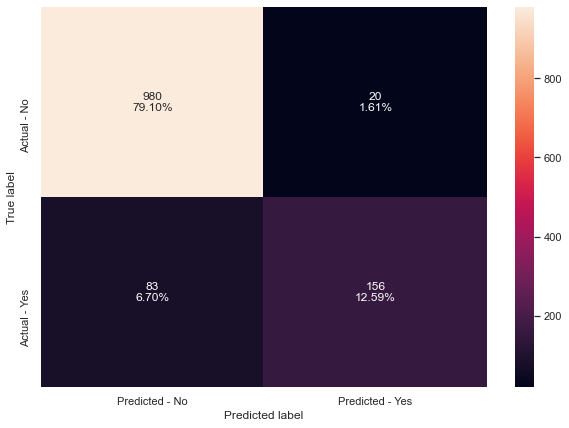

In [173]:
make_confusion_matrix(bagging_estimator,y_test)

#### *Random Forest*

In [137]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [138]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9160613397901534
Recall on training set :  1.0
Recall on test set :  0.6569037656903766
Precision on training set :  1.0
Precision on test set :  0.8770949720670391


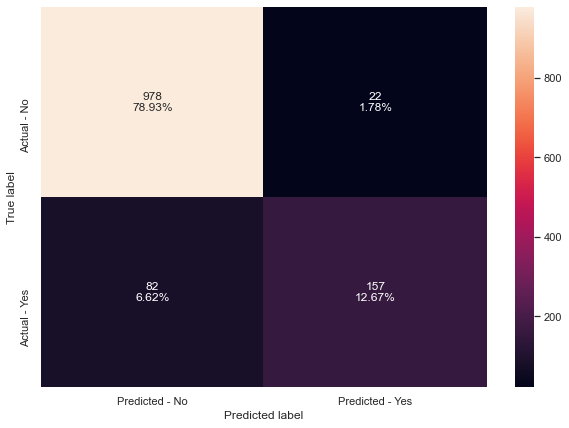

In [139]:
make_confusion_matrix(rf_estimator,y_test)

#### *Decision Tree*

In [160]:
#Train the decision tree classifier
dtree_estimator=DecisionTreeClassifier(random_state=1)
dtree_estimator.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [161]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_score=get_metrics_score(dtree_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9047619047619048
Recall on training set :  1.0
Recall on test set :  0.7615062761506276
Precision on training set :  1.0
Precision on test set :  0.7489711934156379


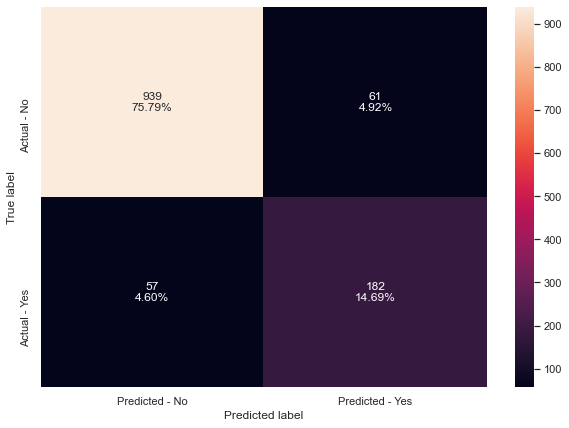

In [235]:
make_confusion_matrix(dtree_estimator,y_test)

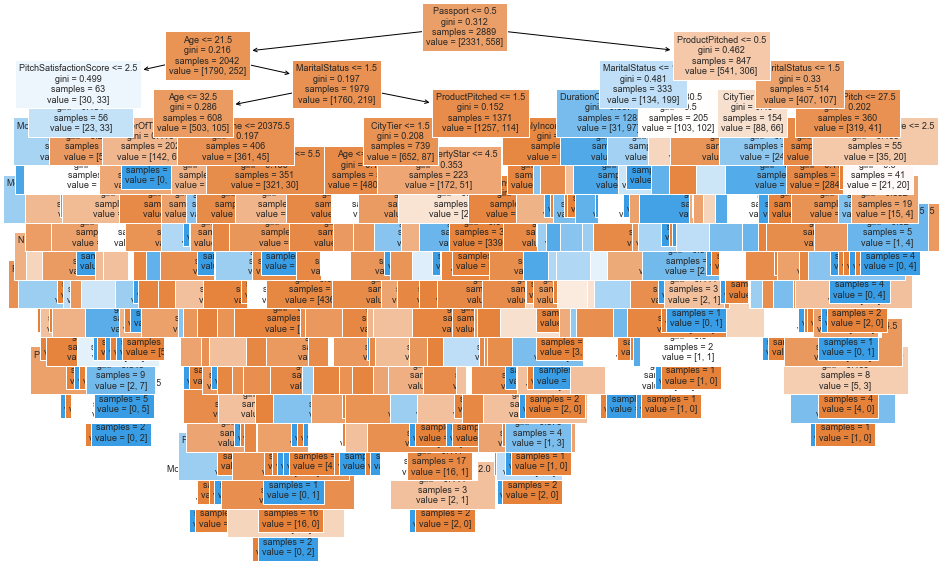

In [240]:
#Plot decision tree
plt.figure(figsize=(15,10))

out = tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

**Insights:**

* True Positives:
 * Reality: A customer made a purchase.
 * Model predicted: The customer will purchase the vacation package.
 * Outcome: The model is good.

* True Negatives:
 * Reality: A customer did NOT make a purchase.
 * Model predicted: The customer will NOT purchase the vacation package.
 * Outcome: The business is unaffected.

* False Positives:
 * Reality: A customer did NOT make a purchase.
 * Model predicted: The customer will purchase the vacation package.
 * Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be purchasing the vacation package.

* False Negatives:
 * Reality: A customer made a purchase.
 * Model predicted: The customer will NOT purchase the vacation package.
 * Outcome: The potential customer is missed by the sales/marketing team




### 05 - Model performance evaluation and improvement (9)
- Comment on which metric is right for model performance evaluation and why? 
- Comment on model performance 
- Can model performance be improved? check and comment

**Discussion:**

* All models (Bagging, Random Forest, and Decision Tree Classifiers) appear to give similar Accuaracy (~91%) on TEST data
* Bagging and Random Forest Classifiers appear to give similar Recall (65%) and Precision (88%) on TEST data
* Decision Tree Classifier does 10% better on Recall score (75%), but 14% worse on Precision (74%) on TEST data
* It appears that all models are slightly overfitting the train data, but not by much

Decision Tree Classifier appears to be best out of 3 (At this point) since it has similar ACCUARACY and better RECALL than the other models. We do decrease PRECISION, but not significantly and we should consider the extra revenue from adding customers will outweigh the increase in number of people to offer vacation packages to.

#### Improvement?

#### *Tuning Bagging Classifier*

In [177]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[7,15,51,101,151],
              'max_features': [0.7,0.8,0.9,1]
             }

grid_obj = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, cv = 5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
bagging_estimator_GSCV = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
bagging_estimator_GSCV.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=151, random_state=1)

In [178]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_GSCV_score=get_metrics_score(bagging_estimator_GSCV)

Accuracy on training set :  1.0
Accuracy on test set :  0.9217110573042776
Recall on training set :  1.0
Recall on test set :  0.6903765690376569
Precision on training set :  1.0
Precision on test set :  0.8776595744680851


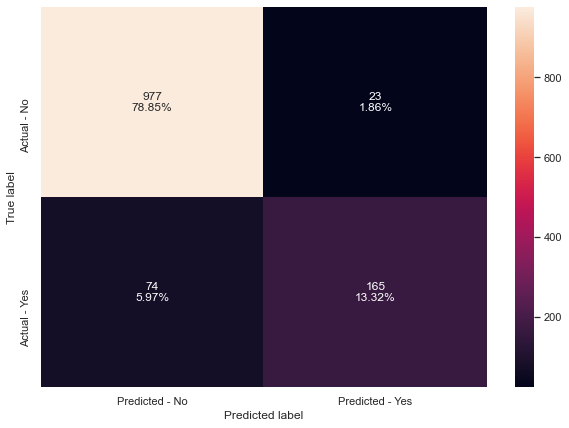

In [179]:
make_confusion_matrix(bagging_estimator_GSCV,y_test)

#### *Tuning Random Forest Classifier*

In [180]:
# Choose the type of classifier. 
rf_estimator_GSCV = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from
parameters = {  
                'max_features': ['sqrt','log2','auto'],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': list(np.linspace(10, 50, 10, dtype = int))}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_GSCV, parameters,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_GSCV = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_GSCV.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=1)

In [181]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_GSCV_score=get_metrics_score(rf_estimator_GSCV)

Accuracy on training set :  1.0
Accuracy on test set :  0.9160613397901534
Recall on training set :  1.0
Recall on test set :  0.6694560669456067
Precision on training set :  1.0
Precision on test set :  0.8648648648648649


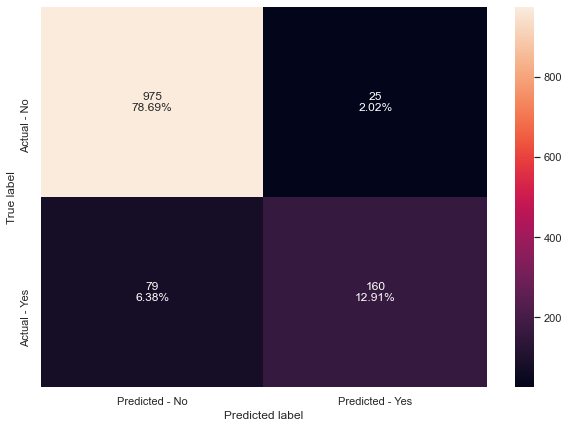

In [182]:
make_confusion_matrix(rf_estimator_GSCV,y_test)

#### *Tuning Decision Tree Classifier*

In [170]:
# Choose the type of classifier. 
dtree_estimator_GSCV = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [5, 10, 15, 20, 25],
              'min_impurity_decrease': [0.000001,0.00001,0.0001,0.001,0.01]
             }


# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_GSCV, parameters,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_GSCV = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator_GSCV.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25,
                       min_impurity_decrease=1e-06, min_samples_leaf=5,
                       random_state=1)

In [168]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_GSCV_score=get_metrics_score(dtree_estimator_GSCV)

Accuracy on training set :  0.8788508134302527
Accuracy on test set :  0.8393866020984665
Recall on training set :  0.5591397849462365
Recall on test set :  0.4560669456066946
Precision on training set :  0.75
Precision on test set :  0.6123595505617978


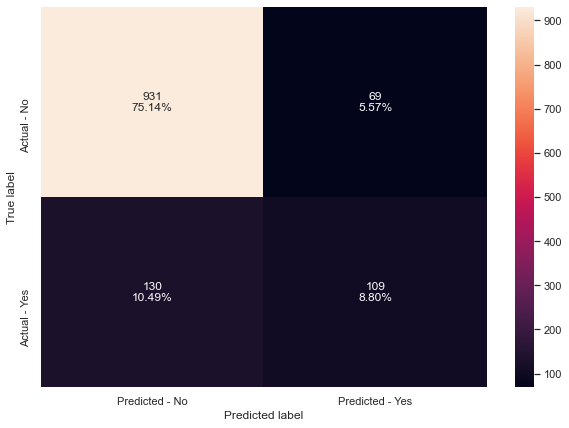

In [169]:
make_confusion_matrix(dtree_estimator_GSCV,y_test)

Discussion

* Tuned Bagging and Random Forest
 * Both attempts at tunning saw slightly better performance in terms of Accuracy and Recall (~1-2% increase)
 * Still not better than Original Decision Tree (with defaults)

* "Tuned" Decision Tree
 * Somehow worse than Default Decision Tree by every metric
 * Definitely DO NOT use this model

### 06 - Model building - Boosting (8)
- Build Adaboost, gradient boost, xgboost and stacking classifier

#### *AdaBoost*

In [183]:
ab_estimator=AdaBoostClassifier(random_state=1)
ab_estimator.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [184]:
#Using above defined function to get accuracy, recall and precision on train and test set
ab_estimator_score=get_metrics_score(ab_estimator)

Accuracy on training set :  0.8521979923849082
Accuracy on test set :  0.8248587570621468
Recall on training set :  0.4175627240143369
Recall on test set :  0.3472803347280335
Precision on training set :  0.6955223880597015
Precision on test set :  0.5763888888888888


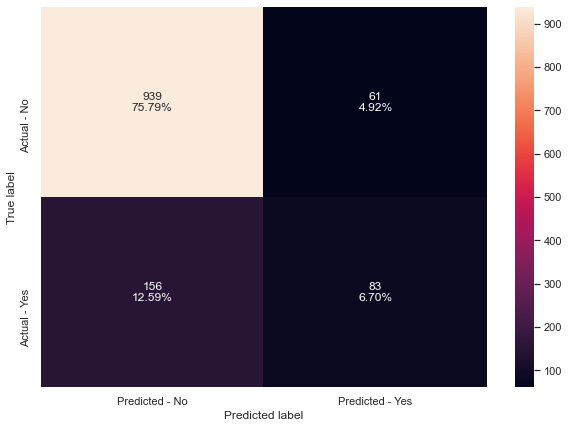

In [185]:
make_confusion_matrix(ab_estimator,y_test)

#### *Gradient Boost*

In [186]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [187]:
#Using above defined function to get accuracy, recall and precision on train and test set
gb_estimator_score=get_metrics_score(gb_estimator)

Accuracy on training set :  0.9020422291450328
Accuracy on test set :  0.8539144471347861
Recall on training set :  0.5734767025089605
Recall on test set :  0.40585774058577406
Precision on training set :  0.8767123287671232
Precision on test set :  0.7132352941176471


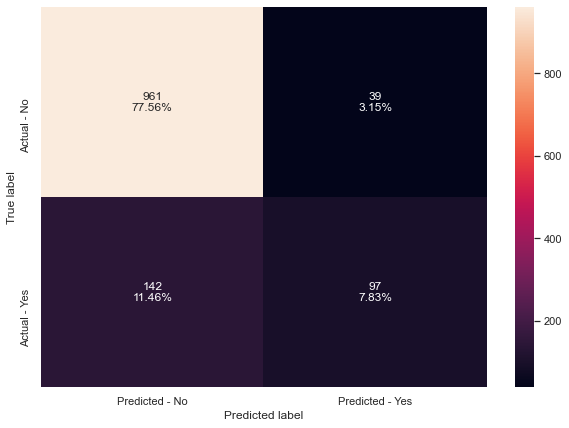

In [188]:
make_confusion_matrix(gb_estimator,y_test)

#### *XGBoost*

In [198]:
xgb_estimator=XGBClassifier(random_state=1)
xgb_estimator.fit(X_train,y_train)

[07:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [199]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_estimator_score=get_metrics_score(xgb_estimator)

Accuracy on training set :  0.9996538594669436
Accuracy on test set :  0.9297820823244553
Recall on training set :  0.9982078853046595
Recall on test set :  0.7238493723849372
Precision on training set :  1.0
Precision on test set :  0.8917525773195877


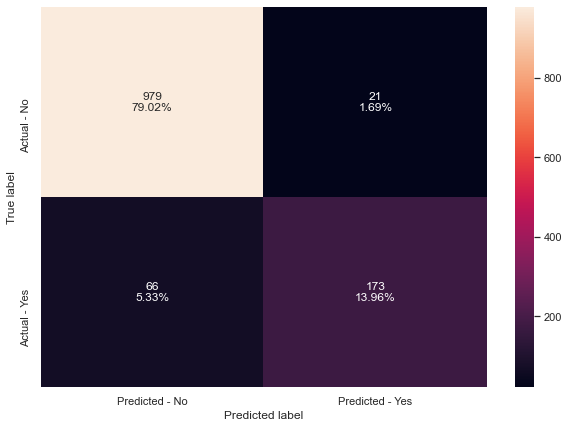

In [200]:
make_confusion_matrix(xgb_estimator,y_test)

#### *Stacking*

In [204]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator_GSCV),
           ('Gradient Boosting', gb_estimator)]
final_estimator=XGBClassifier(random_state=1)

In [205]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[07:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='sqrt',
                                                       n_estimators=41,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 cols...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                   

In [206]:
#Using above defined function to get accuracy, recall and precision on train and test set
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9144471347861178
Recall on training set :  1.0
Recall on test set :  0.7615062761506276
Precision on training set :  1.0
Precision on test set :  0.7878787878787878


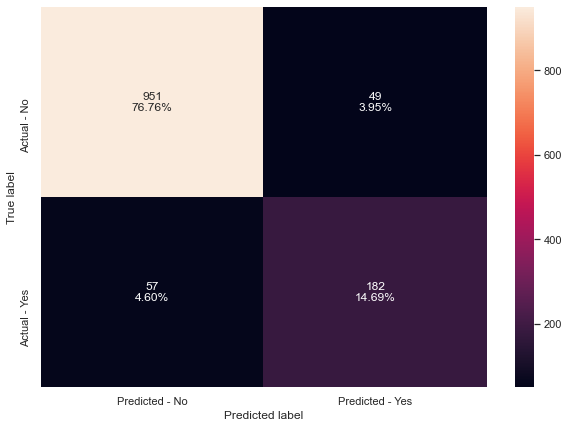

In [208]:
make_confusion_matrix(stacking_estimator,y_test)

### 07 - Model performance evaluation and improvement (12)
- Comment on which metric is right for model performance evaluation and why? 
- Comment on model performance 
- Can model performance be improved? check and comment

Discussion

- AdaBoost and Gradient Boosting did more poor on Accuracy, than previous models, and A LOT more poor on Recall
- XGBoost did nearly as well as original Decision Tree (w/ Defaults) in Accuracy and Recall, but much better on Precision
- Stacking seemed to take the good things from booth Decision Tree and Xgboost 

#### *Tuning AdaBoost Classifier*

In [210]:
# Choose the type of classifier. 
ab_estimator_GSCV = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_estimator_GSCV, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_estimator_GSCV = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_estimator_GSCV.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=1)

In [211]:
#Using above defined function to get accuracy, recall and precision on train and test set
ab_estimator_GSCV_score=get_metrics_score(ab_estimator_GSCV)

Accuracy on training set :  0.857736240913811
Accuracy on test set :  0.8240516545601292
Recall on training set :  0.449820788530466
Recall on test set :  0.3389121338912134
Precision on training set :  0.7070422535211267
Precision on test set :  0.574468085106383


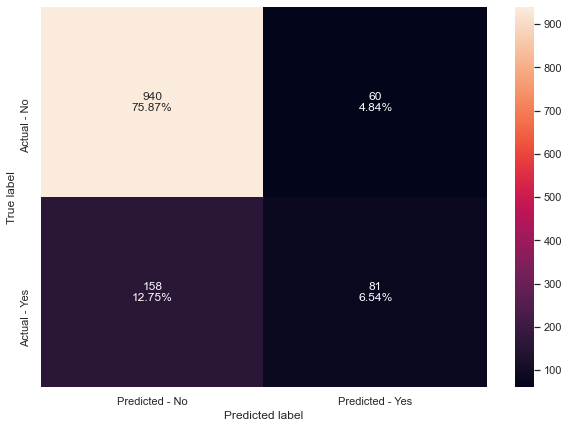

In [212]:
make_confusion_matrix(ab_estimator_GSCV,y_test)

#### *Tuning Gradient Boost Classifier*

In [213]:
# Choose the type of classifier. 
gb_estimator_GSCV = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_estimator_GSCV, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_estimator_GSCV = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_estimator_GSCV.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.8, n_estimators=150,
                           random_state=1, subsample=1)

In [214]:
#Using above defined function to get accuracy, recall and precision on train and test set
gb_estimator_GSCV_score=get_metrics_score(gb_estimator_GSCV)

Accuracy on training set :  1.0
Accuracy on test set :  0.9322033898305084
Recall on training set :  1.0
Recall on test set :  0.7447698744769874
Precision on training set :  1.0
Precision on test set :  0.8855721393034826


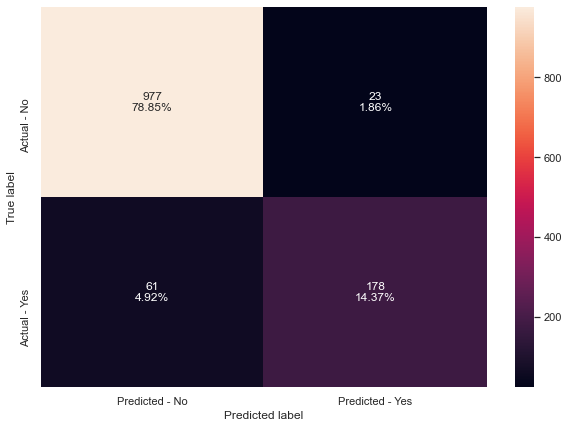

In [218]:
make_confusion_matrix(gb_estimator_GSCV,y_test)

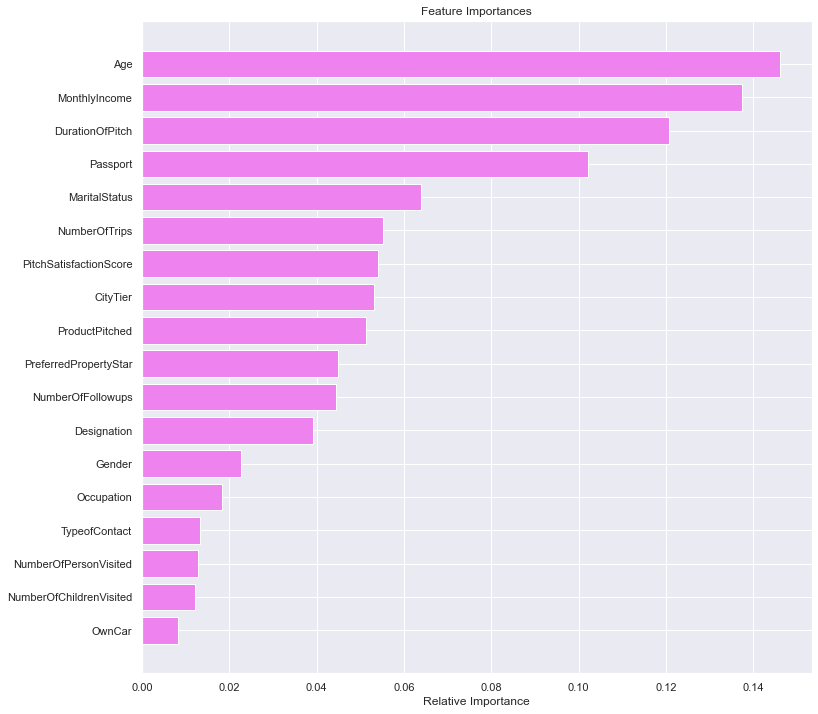

In [231]:
feature_names = X_train.columns
importances = gb_estimator_GSCV.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Top 6 Features:
* Age
* MonthlyIncome
* DurationOfPitch
* Passport
* MaritalStatus
* NumberOfTrips

#### *Tuning XGBoost Classifier*

In [217]:
# Choose the type of classifier. 
xgb_estimator_GSCV = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_estimator_GSCV, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_estimator_GSCV = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_estimator_GSCV.fit(X_train, y_train)

[08:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:43:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:46:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:48:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:49:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:53:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[08:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [219]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_estimator_GSCV_score=get_metrics_score(xgb_estimator_GSCV)

Accuracy on training set :  1.0
Accuracy on test set :  0.9225181598062954
Recall on training set :  1.0
Recall on test set :  0.7238493723849372
Precision on training set :  1.0
Precision on test set :  0.8522167487684729


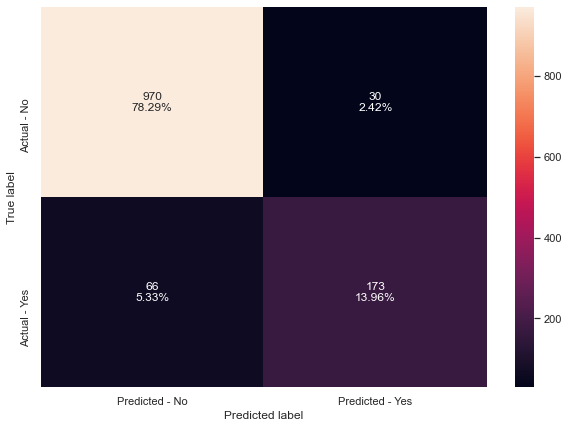

In [220]:
make_confusion_matrix(xgb_estimator_GSCV,y_test)

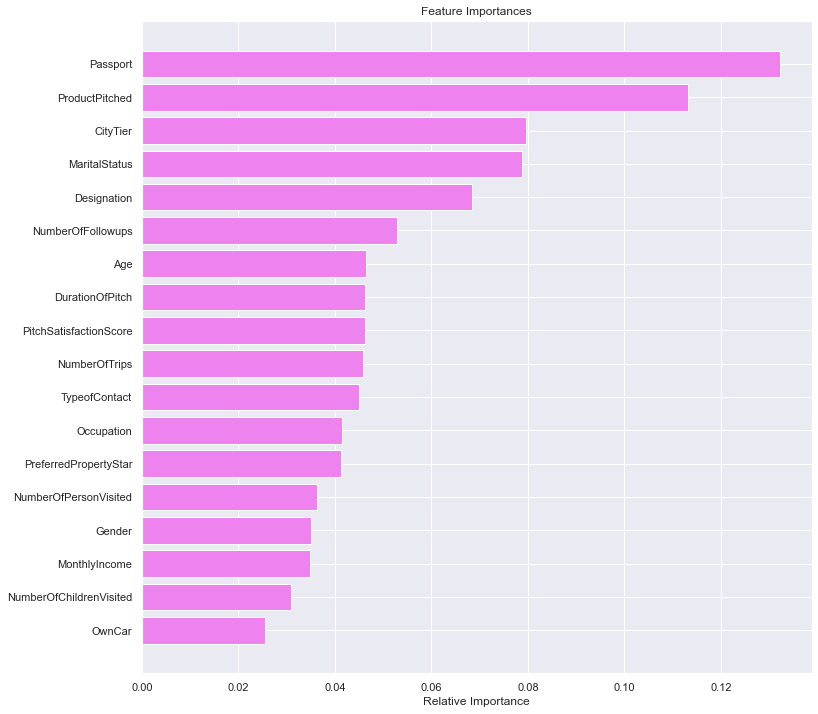

In [232]:
feature_names = X_train.columns
importances = xgb_estimator_GSCV.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Top 6 Features:
* Passport
* ProductPitched
* CityTier
* MaritalStatus
* Designation
* NumberOfFollowups

#### *Tuning Stacking Classifier*

In [223]:
# Add tuned Gradient Boost
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator_GSCV),
           ('Gradient Boosting', gb_estimator_GSCV)]
final_estimator=XGBClassifier(random_state=1) #Should we be using the xgb_estimator_GSCV instead?

In [224]:
stacking_estimator_GSCV=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator_GSCV.fit(X_train,y_train)

[09:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='sqrt',
                                                       n_estimators=41,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_depth=7,
                                                           max_features=0.8,
                                                           n_estimators=150,
                                                           random_state=1,
                                                           subsample=1))],
                   final_estimator=XGBClassifie...
                                

In [225]:
#Using above defined function to get accuracy, recall and precision on train and test set
stacking_estimator_GSCV_score=get_metrics_score(stacking_estimator_GSCV)

Accuracy on training set :  0.9993077189338871
Accuracy on test set :  0.9281678773204197
Recall on training set :  0.996415770609319
Recall on test set :  0.7824267782426778
Precision on training set :  1.0
Precision on test set :  0.8348214285714286


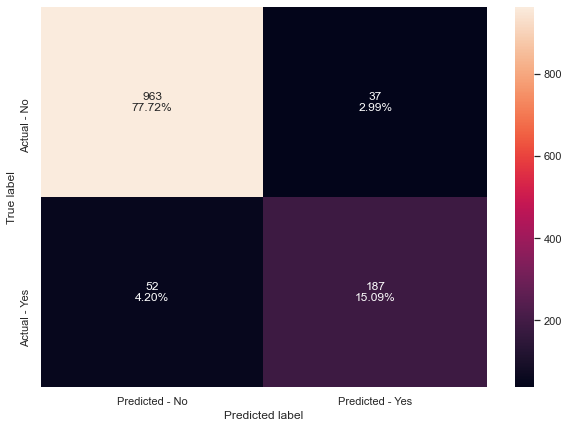

In [226]:
make_confusion_matrix(stacking_estimator_GSCV,y_test)

### 08 - Actionable Insights & Recommendations (5)
- Compare models - Business recommendations and insights

#### Insights

In [227]:
# defining list of models
models = [bagging_estimator, bagging_estimator_GSCV,  
          rf_estimator, rf_estimator_GSCV,
          dtree_estimator, dtree_estimator_GSCV, 
          ab_estimator, ab_estimator_GSCV, 
          gb_estimator, gb_estimator_GSCV, 
          xgb_estimator, xgb_estimator_GSCV, 
          stacking_estimator, stacking_estimator_GSCV]

# defining empty lists to add train and test results
accuracy_train = []
accuracy_test = []
recall_train= []
recall_test= []
precision_train= []
precision_test= []


# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_metrics_score(model,False)
    accuracy_train.append(j[0])
    accuracy_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [242]:
comparison_frame = pd.DataFrame({'Model':['Bagging','Tuned Bagging',
                                          'Random Forest','Tuned Random Forest',
                                          'Decision Tree','Tuned Decision Tree',
                                          'AdaBoost Classifier', 'Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier',
                                          'Stacking Classifier', 'Tuned Stacking Classifier'], 
                                          'Train_Accuracy': accuracy_train,'Test_Accuracy': accuracy_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                              Bagging        0.993423       0.916868   
1                        Tuned Bagging        1.000000       0.921711   
2                        Random Forest        1.000000       0.916061   
3                  Tuned Random Forest        1.000000       0.916061   
4                        Decision Tree        1.000000       0.904762   
5                  Tuned Decision Tree        0.878851       0.839387   
6                  AdaBoost Classifier        0.852198       0.824859   
7            Tuned AdaBoost Classifier        0.857736       0.824052   
8         Gradient Boosting Classifier        0.902042       0.853914   
9   Tuned Gradient Boosting Classifier        1.000000       0.932203   
10                  XGBoost Classifier        0.999654       0.929782   
11            Tuned XGBoost Classifier        1.000000       0.922518   
12                 Stacking Classifier        1.000000       0.914447   
13           Tuned Stacking Classifier        0.999308       0.928168   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.965950     0.652720         1.000000        0.886364  
1       1.000000     0.690377         1.000000        0.877660  
2       1.000000     0.656904         1.000000        0.877095  
3       1.000000     0.669456         1.000000        0.864865  
4       1.000000     0.761506         1.000000        0.748971  
5       0.559140     0.456067         0.750000        0.612360  
6       0.417563     0.347280         0.695522        0.576389  
7       0.449821     0.338912         0.707042        0.574468  
8       0.573477     0.405858         0.876712        0.713235  
9       1.000000     0.744770         1.000000        0.885572  
10      0.998208     0.723849         1.000000        0.891753  
11      1.000000     0.723849         1.000000        0.852217  
12      1.000000     0.761506         1.000000        0.787879  
13      0.996416     0.782427         1.000000        0.834821

#### Business Recommendations

LATE VERSION (Complete) - Unable to run all the tuned models before submission deadline =(

- The best model (in terms of all the scoring criteria - i.e., Accuracy, Recall, and Precision) for predicting whether a customer would purchase a vacation package appears to be the TUNED Stacking Classifier model, as it boasts the 2nd best Accuracy, the 1st best Recall, and very good (although 8th) Precision. 
- Unsure how this model will translate to the new Wellness Package, as we do not really have any data on people to support prediction of that package specifically. Models only trained to determine whether customer will pick a vacation package (or NOT) with absolutely no regard to the specific package type. The question remains, would those clients have picked a different package if offered?
- Interestingly the Gradient Boosting and XGBoost Models picked up on (almost) completely different features/variables as their "TOP" features. Those include these as TOP 10:
 * Age
 * MonthlyIncome
 * DurationOfPitch
 * Passport
 * MaritalStatus
 * ProductPitched
 * CityTier
 * Designation
 * NumberOfFollowups
 * NumberOfTrips
- Given the discrepency above, it is hard to understand how each of the variables interact with each other to provide robust models of predicted behavior (either purchasing or not purchasing the vacation package). 
- Further analysis is needed, especially in determining whether combinations of the above parameters are good indicators of specific types of packages that certain groups are more likely to purchase - which will be able to target folks for the new Wellness Package
- At the very least, travel agents will have a much more narrow list of information that is needed from current/new clients to determine whether to pitch a vacation at all

In [1]:
a = lambda x,y: x+y
print(a(1,2))

3
